# Тематический анализ современной российской поэзии по материалам портала __[stihi.ru](https://stihi.ru/)__
<div class="alert alert-block alert-warning">
    <b>О наборе данных:</b> К середине ноября 2019 года на портале размещено более <em>40 миллионов</em> произведений. Для проекта были собраны лишь тексты из раздела <a href='https://stihi.ru/poems/selected.html'>Рекомендуемые произведения</a>. Всего анализируется <b>22834</b> текста за период 3 года - с ноября 2016 по ноябрь 2019 годов.
</div>

## 1. Подготовка текстовых данных

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import bokeh as bk

In [2]:
pd.reset_option("all")


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



C:\Users\Supervisor\Anaconda3\lib\site-packages\pandas\_config\config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [3]:
raw_data = pd.read_csv('./data/stihiru_selected_dump_2016_11_2019_11.csv', encoding='utf8', sep=';')
raw_data = raw_data[raw_data.duplicated() == False]
raw_data.reset_index(drop=True, inplace=True)

In [4]:
raw_data

,topic,year,month,day,index,author_name,author_nick,title,text
0,-1,2016,11,30,6522,Нина Злаказова,znina,годовщина,"\nКак тридцать три стукнет,\nкорыто отдам закл..."
1,-1,2016,11,30,6705,Геворк,katvel,Улица,"\nВот улица есть и на ней есть прохожий,\nв од..."
2,-1,2016,11,21,7163,Ольга Костякова,kurtovabkru,Мы раньше песни пели,"\nМы раньше песни пели,\nНам было не до сна -\..."
3,-1,2016,11,17,3413,Сергей Бандуровский,bandurowscky,Стоят деревья без листвы,\n ***\nСтоят деревья без листвы...\nП...
4,-1,2016,11,17,3908,Полина Ерофеева,otherwise,призрак Ширли Мэнсон,\nШирли Мэнсон в красном халате \nШастает по б...
...,...,...,...,...,...,...,...,...,...
22829,-1,2019,11,1,5164,Сергей Артюх,artuchsmailru,18. 10. 19 Русский космизм это ваши сани,\n18.10.19 “ Русский космизм – это ваши сани ...
22830,-1,2019,11,1,4456,Дарья Татарчук,daryatatarchuk,Нашим бабушкам и дедушкам,"\nИм нужно чуть больше внимания, \nИ несколько..."
22831,-1,2019,11,1,4429,Катерина Ия Баранова,shenkat,Призрак розы,\nрусский вариант текста песни Ghost of a Rose...
22832,-1,2019,11,1,2127,Александр Анайкин,malyr,Огромный шар закатного светила,\nОгромный шар закатного светила\nОкрасил снег...


<div class="alert alert-block alert-info"> В исходных данных будем рассмтаривать два набора - <b>заголовки</b> и <b>тексты</b> стихов. Дальнейший анализ проведём для этих двух наборов по отдельности.<br>
Также преобразуем даты публикации в формат pandas и отбросим ненужные параметры - topic, index, author_nick.
</div>

In [5]:
working_data = raw_data.drop(['year', 'month', 'day', 'topic', 'index', 'author_nick'], axis=1)

In [6]:
working_data['date'] = pd.to_datetime(raw_data[['year', 'month', 'day']])
working_data

,author_name,title,text,date
0,Нина Злаказова,годовщина,"\nКак тридцать три стукнет,\nкорыто отдам закл...",2016-11-30
1,Геворк,Улица,"\nВот улица есть и на ней есть прохожий,\nв од...",2016-11-30
2,Ольга Костякова,Мы раньше песни пели,"\nМы раньше песни пели,\nНам было не до сна -\...",2016-11-21
3,Сергей Бандуровский,Стоят деревья без листвы,\n ***\nСтоят деревья без листвы...\nП...,2016-11-17
4,Полина Ерофеева,призрак Ширли Мэнсон,\nШирли Мэнсон в красном халате \nШастает по б...,2016-11-17
...,...,...,...,...
22829,Сергей Артюх,18. 10. 19 Русский космизм это ваши сани,\n18.10.19 “ Русский космизм – это ваши сани ...,2019-11-01
22830,Дарья Татарчук,Нашим бабушкам и дедушкам,"\nИм нужно чуть больше внимания, \nИ несколько...",2019-11-01
22831,Катерина Ия Баранова,Призрак розы,\nрусский вариант текста песни Ghost of a Rose...,2019-11-01
22832,Александр Анайкин,Огромный шар закатного светила,\nОгромный шар закатного светила\nОкрасил снег...,2019-11-01


<div class="alert alert-block alert-info">Удаление знаков препинания и символов новой строки</div>

In [7]:
import re

In [8]:
def strip_punctuation(string):
    if type(string)!=str:
        string=str(string)                     # если в ячейке число, преобразуем в строку
    string = string.replace(u'\xa0','')        # удаляем юникодовский non-breaking space
    string = re.sub(r'\n{2}', ' ', string)     # заменяем две и более пустых строк подряд одной
    string = string.lower().replace('\n',' ')  # приводим к нижнему регистру и заменяем переводы строки пробелами    
    string = re.sub(r'[^\w\s]', '', string)    # удаляем небуквенные символы, оставляем пробелы
    string = re.sub(r'\s{2}', ' ', string)     # заменяем болеее двух пробелов подряд одним
    return string.strip(' ')                   # удаляем пробелы в конце и начале текста

In [9]:
print(working_data.iloc[122]['text'])


* * *

Смех эолов. От легкого взмаха
Причитает листва, голося, 
И становится птицей рубаха,
На упрямых прищепках вися.

Так наивное слово бывает, 
Прилетев из дурной кутерьмы,
Нашу душу на миг открывает, 
Но трепещем и прячемся мы,

Существуя как список и слепок
Чудной жизни, незримой опять...
Остаётся не видеть прищепок
И немыслимый взлет вспоминать.



In [10]:
print(strip_punctuation(working_data.iloc[122]['text']))

смех эолов от легкого взмаха причитает листва голося и становится птицей рубаха на упрямых прищепках вися так наивное слово бывает прилетев из дурной кутерьмы нашу душу на миг открывает но трепещем и прячемся мы существуя как список и слепок чудной жизни незримой опять остаётся не видеть прищепок и немыслимый взлет вспоминать


In [11]:
working_data['title'] = working_data['title'].apply(strip_punctuation)
working_data['text'] = working_data['text'].apply(strip_punctuation)
working_data

,author_name,title,text,date
0,Нина Злаказова,годовщина,как тридцать три стукнет корыто отдам заклеить...,2016-11-30
1,Геворк,улица,вот улица есть и на ней есть прохожий в один и...,2016-11-30
2,Ольга Костякова,мы раньше песни пели,мы раньше песни пели нам было не до сна веселы...,2016-11-21
3,Сергей Бандуровский,стоят деревья без листвы,стоят деревья без листвы покорны ветру и погод...,2016-11-17
4,Полина Ерофеева,призрак ширли мэнсон,ширли мэнсон в красном халате шастает по балко...,2016-11-17
...,...,...,...,...
22829,Сергей Артюх,18 10 19 русский космизм это ваши сани,181019 русский космизм это ваши сани создатель...,2019-11-01
22830,Дарья Татарчук,нашим бабушкам и дедушкам,им нужно чуть больше внимания и несколько искр...,2019-11-01
22831,Катерина Ия Баранова,призрак розы,русский вариант текста песни ghost of a rosebl...,2019-11-01
22832,Александр Анайкин,огромный шар закатного светила,огромный шар закатного светила окрасил снег ба...,2019-11-01


<div class="alert alert-block alert-info">Постановка слов в начальную форму. Учёт длины текста</div>

In [12]:
from pymystem3 import Mystem
m = Mystem()

In [13]:
print(working_data.iloc[16409]['text'])

опять в плену я звёздной выси и тут желание любить во всей вселенной нет той выти где я бы смог тебя забыть я вижу негде мне укрыться и месяц ближе для мечты моя душа как он лучится в глаза красивые твои пора на землю слава богу грусть не сожгла совсем меня жаль ближе твоего порога была зелёная звезда  2014


In [14]:
print(m.lemmatize(working_data.iloc[16409]['text']))

['опять', ' ', 'в', ' ', 'плен', ' ', 'я', ' ', 'звездный', ' ', 'высь', ' ', 'и', ' ', 'тут', ' ', 'желание', ' ', 'любить', ' ', 'во', ' ', 'весь', ' ', 'вселенная', ' ', 'нет', ' ', 'тот', ' ', 'выть', ' ', 'где', ' ', 'я', ' ', 'бы', ' ', 'смочь', ' ', 'ты', ' ', 'забывать', ' ', 'я', ' ', 'видеть', ' ', 'негде', ' ', 'я', ' ', 'укрываться', ' ', 'и', ' ', 'месяц', ' ', 'близко', ' ', 'для', ' ', 'мечта', ' ', 'мой', ' ', 'душа', ' ', 'как', ' ', 'он', ' ', 'лучиться', ' ', 'в', ' ', 'глаз', ' ', 'красивый', ' ', 'твой', ' ', 'пора', ' ', 'на', ' ', 'земля', ' ', 'слава', ' ', 'бог', ' ', 'грусть', ' ', 'не', ' ', 'сжигать', ' ', 'совсем', ' ', 'я', ' ', 'жаль', ' ', 'близко', ' ', 'твой', ' ', 'порог', ' ', 'быть', ' ', 'зеленый', ' ', 'звезда', '  ', '2014', '\n']


<div class="alert alert-block alert-warning">Лемматизация всего набора занимает несколько часов, поэтому код закомментирован. Результат сохраняется в файл, далее работа производится с сохранёнными данными</div>

In [15]:
# working_data['title'] = working_data['title'].apply(lambda x: m.lemmatize(x))
# working_data['text'] = working_data['text'].apply(lambda x: m.lemmatize(x))

In [16]:
# working_data.to_csv('./data/stihiru_selected_dump_lammatized.csv', encoding='utf8', sep=';', index=False)
# working_data.to_pickle('./data/stihiru_selected_dump_lammatized.pkl')

<div class="alert alert-block alert-info">
    <p>Загружаем сохранённые данные.</p>
</div>

In [17]:
import pickle

In [18]:
working_data = pd.read_pickle('./data/stihiru_selected_dump_lammatized.pkl')

In [19]:
working_data.reset_index(drop=True, inplace=True)

In [20]:
working_data

,author_name,title,text,date
0,Нина Злаказова,"[годовщина, \n]","[как, , тридцать, , три, , стукнуть, , кор...",2016-11-30
1,Геворк,"[улица, \n]","[вот, , улица, , быть, , и, , на, , она, ...",2016-11-30
2,Ольга Костякова,"[мы, , рано, , песня, , петь, \n]","[мы, , рано, , песня, , петь, , мы, , быт...",2016-11-21
3,Сергей Бандуровский,"[стоять, , дерево, , без, , листва, \n]","[стоять, , дерево, , без, , листва, , поко...",2016-11-17
4,Полина Ерофеева,"[призрак, , ширли, , мэнсон, \n]","[ширли, , мэнсон, , в, , красный, , халат,...",2016-11-17
...,...,...,...,...
22829,Сергей Артюх,"[18, , 10, , 19, , русский, , космизм, , ...","[181019, , русский, , космизм, , это, , ва...",2019-11-01
22830,Дарья Татарчук,"[наш, , бабушка, , и, , дедушка, \n]","[они, , нужно, , чуть, , много, , внимание...",2019-11-01
22831,Катерина Ия Баранова,"[призрак, , роза, \n]","[русский, , вариант, , текст, , песня, , g...",2019-11-01
22832,Александр Анайкин,"[огромный, , шар, , закатный, , светило, \n]","[огромный, , шар, , закатный, , светило, ,...",2019-11-01


<div class='alert alert-block alert-danger'>
    <p><b>Исходный набор данных содержит повторяющиеся записи, т.е. некоторые тексты опубликованы несколько раз в разные даты. При этом дубликаты могут незначительно отличаться, например, количествои пустых строк в конце или в начале стихотворения, в результате таким дубликатам соответствуют разные значения хэш-функции и они не обнаруживаются методом DataFrame.duplicated(). Выяснилось это на конечной стадии тематического моделирования, когда в выборках наиболее релевантных текстов темы дважды или трижды присутствовал один и тот же текст. Моделирование пришлось повторять.</b></p>
    <p><b>Наличие дубликатов в наборе документов (особенно с большим числом слов) может значительно исказить статистику встерчаемости слов. Поэтому от дубликатов неободимо избавляться</b></p>
    <p><b>Эффективнее всего устранять дубликаты после очистки неинформативнгых символов и приведения слов к грамматическим основам - так становится возможно выявить дубликаты, отличающиеся, нпример, числом пробелов или пустых строк, пунктуацией.</b></p>
</div>

In [21]:
lemmatized_texts = working_data.loc[:, ['title', 'text']]
lemmatized_texts['title'] = lemmatized_texts['title'].apply(lambda x: ' '.join(x))
lemmatized_texts['text'] = lemmatized_texts['text'].apply(lambda x: ' '.join(x))
lemmatized_texts

,title,text
0,годовщина \n,как тридцать три стукнуть корыто отд...
1,улица \n,вот улица быть и на она быть про...
2,мы рано песня петь \n,мы рано песня петь мы быть не до...
3,стоять дерево без листва \n,стоять дерево без листва покорный ве...
4,призрак ширли мэнсон \n,ширли мэнсон в красный халат шастать...
...,...,...
22829,18 10 19 русский космизм это ваш ...,181019 русский космизм это ваш сани ...
22830,наш бабушка и дедушка \n,они нужно чуть много внимание и не...
22831,призрак роза \n,русский вариант текст песня ghost of...
22832,огромный шар закатный светило \n,огромный шар закатный светило окрашива...


In [22]:
lemmatized_texts['text'].duplicated(keep='first').value_counts()

False    22782
True        52
Name: text, dtype: int64

In [23]:
lemmatized_texts['text'].duplicated(keep=False).value_counts()

False    22740
True        94
Name: text, dtype: int64

<div class='alert alert-block alert-danger'>Обнаружено <b>52</b> текстов, являющихся дубликатами. Всего текстов, имеющих дубликаты, и их дубликатов обнаружено <b>94.</b></div>

In [24]:
duplicate_indices = lemmatized_texts[lemmatized_texts['text'].duplicated(keep='first')==True].index
duplicate_indices

Int64Index([ 3985,  4467,  5606,  5760,  6368,  6935,  7023,  7067,  7655,
             7942,  8154,  8382,  8481,  8508,  8535,  8985,  9146,  9429,
             9863, 10202, 10557, 10760, 10972, 11101, 11481, 11841, 11938,
            12709, 13129, 13189, 13421, 13491, 13494, 14349, 14961, 15423,
            15489, 15717, 15765, 16186, 16228, 16386, 17522, 17614, 18993,
            18998, 19862, 20163, 20327, 20913, 20948, 21818],
           dtype='int64')

In [25]:
raw_data.drop(index=duplicate_indices, inplace=True)
raw_data.reset_index(drop=True, inplace=True)
raw_data

,topic,year,month,day,index,author_name,author_nick,title,text
0,-1,2016,11,30,6522,Нина Злаказова,znina,годовщина,"\nКак тридцать три стукнет,\nкорыто отдам закл..."
1,-1,2016,11,30,6705,Геворк,katvel,Улица,"\nВот улица есть и на ней есть прохожий,\nв од..."
2,-1,2016,11,21,7163,Ольга Костякова,kurtovabkru,Мы раньше песни пели,"\nМы раньше песни пели,\nНам было не до сна -\..."
3,-1,2016,11,17,3413,Сергей Бандуровский,bandurowscky,Стоят деревья без листвы,\n ***\nСтоят деревья без листвы...\nП...
4,-1,2016,11,17,3908,Полина Ерофеева,otherwise,призрак Ширли Мэнсон,\nШирли Мэнсон в красном халате \nШастает по б...
...,...,...,...,...,...,...,...,...,...
22777,-1,2019,11,1,5164,Сергей Артюх,artuchsmailru,18. 10. 19 Русский космизм это ваши сани,\n18.10.19 “ Русский космизм – это ваши сани ...
22778,-1,2019,11,1,4456,Дарья Татарчук,daryatatarchuk,Нашим бабушкам и дедушкам,"\nИм нужно чуть больше внимания, \nИ несколько..."
22779,-1,2019,11,1,4429,Катерина Ия Баранова,shenkat,Призрак розы,\nрусский вариант текста песни Ghost of a Rose...
22780,-1,2019,11,1,2127,Александр Анайкин,malyr,Огромный шар закатного светила,\nОгромный шар закатного светила\nОкрасил снег...


In [26]:
working_data.drop(index=duplicate_indices, inplace=True)
working_data.reset_index(drop=True, inplace=True)
working_data

,author_name,title,text,date
0,Нина Злаказова,"[годовщина, \n]","[как, , тридцать, , три, , стукнуть, , кор...",2016-11-30
1,Геворк,"[улица, \n]","[вот, , улица, , быть, , и, , на, , она, ...",2016-11-30
2,Ольга Костякова,"[мы, , рано, , песня, , петь, \n]","[мы, , рано, , песня, , петь, , мы, , быт...",2016-11-21
3,Сергей Бандуровский,"[стоять, , дерево, , без, , листва, \n]","[стоять, , дерево, , без, , листва, , поко...",2016-11-17
4,Полина Ерофеева,"[призрак, , ширли, , мэнсон, \n]","[ширли, , мэнсон, , в, , красный, , халат,...",2016-11-17
...,...,...,...,...
22777,Сергей Артюх,"[18, , 10, , 19, , русский, , космизм, , ...","[181019, , русский, , космизм, , это, , ва...",2019-11-01
22778,Дарья Татарчук,"[наш, , бабушка, , и, , дедушка, \n]","[они, , нужно, , чуть, , много, , внимание...",2019-11-01
22779,Катерина Ия Баранова,"[призрак, , роза, \n]","[русский, , вариант, , текст, , песня, , g...",2019-11-01
22780,Александр Анайкин,"[огромный, , шар, , закатный, , светило, \n]","[огромный, , шар, , закатный, , светило, ,...",2019-11-01


<div class="alert alert-block alert-info">Удаляем пробелы, переводы строки, знаки подчёркивания, ссылки на вэб-страницы.</div>

In [27]:
def remove_garbage(string_list):
    clean_string = []
    space_pattern = re.compile('^\s+')
    url_pattern = re.compile('^http')
    underline_pattern = re.compile('^_')
    for string in string_list:
        if space_pattern.match(string) is None \
            and url_pattern.match(string) is None \
            and underline_pattern.match(string) is None:        
            clean_string.append(string)
    return clean_string

In [28]:
working_data['title'] = working_data['title'].apply(remove_garbage)
working_data['text'] = working_data['text'].apply(remove_garbage)

<div class="alert alert-block alert-info">Удаляем стоп-слова.  Подсчитываем количество слов в текстах.</div>

In [29]:
from nltk.corpus import stopwords

In [30]:
stop_words = stopwords.words('russian')

In [31]:
working_data['title'] = working_data['title'].apply(
    lambda word_list: [word for word in word_list if word not in stop_words]
)
working_data['title_len'] = working_data['title'].apply(lambda x: len(x))
working_data['text'] = working_data['text'].apply(
    lambda word_list: [word for word in word_list if word not in stop_words]
)
working_data['text_len'] = working_data['text'].apply(lambda x: len(x))

In [32]:
working_data

,author_name,title,text,date,title_len,text_len
0,Нина Злаказова,[годовщина],"[тридцать, стукнуть, корыто, отдавать, заклеив...",2016-11-30,1,59
1,Геворк,[улица],"[улица, прохожий, дом, улица, вхожий, хозяин, ...",2016-11-30,1,35
2,Ольга Костякова,"[рано, песня, петь]","[рано, песня, петь, сон, веселый, капель, дари...",2016-11-21,3,85
3,Сергей Бандуровский,"[стоять, дерево, листва]","[стоять, дерево, листва, покорный, ветер, пого...",2016-11-17,3,34
4,Полина Ерофеева,"[призрак, ширли, мэнсон]","[ширли, мэнсон, красный, халат, шастать, балко...",2016-11-17,3,89
...,...,...,...,...,...,...
22777,Сергей Артюх,"[18, 10, 19, русский, космизм, это, ваш, сани]","[181019, русский, космизм, это, ваш, сани, соз...",2019-11-01,8,629
22778,Дарья Татарчук,"[наш, бабушка, дедушка]","[нужно, внимание, несколько, искренний, слово,...",2019-11-01,3,44
22779,Катерина Ия Баранова,"[призрак, роза]","[русский, вариант, текст, песня, ghost, of, a,...",2019-11-01,2,86
22780,Александр Анайкин,"[огромный, шар, закатный, светило]","[огромный, шар, закатный, светило, окрашивать,...",2019-11-01,4,49


In [33]:
from scipy.stats.distributions import norm, lognorm

In [34]:
import bokeh.plotting as bkp
import bokeh.models as bkm
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [35]:
def bokeh_hist_plot(title, data, bins, fig_size=(400,400), x_range=None, pdf_fit='norm'):
    p = bkp.figure(
        title=title, 
        tools='', background_fill_color="#fafafa", plot_width=fig_size[0], plot_height=fig_size[1]
    )
    
    p.title.text_font_size = '12pt'
    p.title.text_font_style = 'bold'
    hist, edges = np.histogram(data, bins=bins, density=True)    
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)
    
    data_max = np.max(data)
    data_min = np.min(data)
    data_range = data_max - data_min
    data_avg = np.mean(data)
    data_std = np.std(data)
    
    hist_max = np.max(hist)
    
    x = np.linspace(data_min, data_max, bins*10)
    if 'norm' == pdf_fit:
        mu, sigma = norm.fit(data)
        pdf = norm.pdf(x, mu, sigma)
    elif 'lognorm' == pdf_fit:
        shape, loc, scale = lognorm.fit(data)
        pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)
        
    p.line(x, pdf, line_color="#ff8888", line_width=4, alpha=0.7, legend="fit")
    

    p.y_range.start = 0
    p.y_range.end = 1.2 * hist_max
    if x_range is not None:
        p.x_range.start = x_range[0]
        data_min = x_range[0]
        p.x_range.end = x_range[1]
        data_max = x_range[1]
        data_range = data_max - data_min
    p.legend.location = "center_right"
    p.legend.background_fill_color = "#fefefe"
    p.xaxis.axis_label = 'x'
    p.yaxis.axis_label = 'Pr(x)'
    p.grid.grid_line_color="white"
    
    description = bkm.Label(
        x=data_max - 0.4 * data_range, y=1.1 * hist_max, x_units='data', y_units='data',
        text=f'\u03bc={data_avg:.3f}, \u03c3={data_std:.3f}', render_mode='css',
        #border_line_color='black', border_line_alpha=1.0,
        background_fill_color='white', background_fill_alpha=0.0,
        text_font_size='12pt', text_font_style='italic'
    )
    p.add_layout(description)
    bkp.show(p)
    return p


In [36]:
working_data['title_len'].describe()

count    22782.000000
mean         2.038408
std          1.183364
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: title_len, dtype: float64

In [37]:
bokeh_hist_plot(
    title='Распределение количества слов в названиях',
    data=working_data['title_len'],
    bins=10,
    fig_size=(600,400),
    pdf_fit='lognorm'
)

Figure(id='1002', ...)

In [38]:
working_data['text_len'].describe()

count    22782.000000
mean        66.929374
std        144.673070
min          0.000000
25%         35.000000
50%         51.000000
75%         71.000000
max       9794.000000
Name: text_len, dtype: float64

In [39]:
bokeh_hist_plot(
    title='Распределение количества слов в текстах',
    data=working_data['text_len'],
    bins=979,
    fig_size=(600,400),
    x_range=(0,200),
    pdf_fit='lognorm'
)

Figure(id='1110', ...)

## 2. Построение словарей

In [40]:
from gensim import corpora, models

In [41]:
title_basic_model = models.Phrases(sentences=working_data['title'], min_count=2, threshold=5)
text_basic_model = models.Phrases(sentences=working_data['text'], min_count=2, threshold=5)

In [42]:
title_phrase_model = models.phrases.Phraser(title_basic_model)
text_phrase_model = models.phrases.Phraser(text_basic_model)

In [43]:
def build_bigram_list(phrase_model, text_corpus):
    bigram_list = [phrase_model[item] for item in text_corpus]
    return bigram_list

In [44]:
print(working_data.iloc[173]['text'])

['черный', 'белый', 'стереть', 'граница', 'зона', 'правило', 'скомкивать', 'взрывать', 'город', 'сорвать', 'маска', 'посмешище', 'становиться', 'закон', 'расслабляться', 'рискнуть', 'зайти', 'сюда', 'потерять', 'хаос', 'этаж', 'накрывать', 'смятение', 'штормить', 'небрежный', 'эскиз', 'лежать', 'яркий', 'безумный', 'цветной', 'многомерный', 'мир', 'взламывать', 'смысл', 'дверь', 'миг', 'сон', 'тянуть', 'продрогнуть', 'рука', 'беда', 'выжигать', 'душа', 'жалкий', 'смешной', 'каждый', 'радость', 'трижды', 'предавать', 'сотня', 'запутывать', 'сложный', 'чужой', 'путь', 'сумрак', 'вести', 'предел', 'твой', 'нора', 'идти', 'никуда', 'фонарь', 'идея', 'пятка', 'грудь', 'аллегория', 'плащ', 'прикрывать', 'слово', 'оттачивать', 'нож', 'разбитый', 'утопия', 'скорбеть', 'спотыкаться', 'мучиться', 'дрожь', 'путник', 'знать', 'добро', 'зло', 'тень', 'ложь', 'отголосок', 'уходить', 'зеркало', 'это', 'мир', 'лабиринт', 'твой', 'душа', 'попытаться', 'понимать', 'искать']


In [45]:
print(*title_basic_model[working_data.iloc[173]['text']])

черный_белый стереть граница зона правило скомкивать взрывать город сорвать маска посмешище становиться закон расслабляться рискнуть зайти сюда потерять хаос этаж накрывать смятение штормить небрежный эскиз лежать яркий безумный цветной многомерный мир взламывать смысл дверь миг сон тянуть продрогнуть рука беда выжигать душа жалкий смешной каждый радость трижды предавать сотня запутывать сложный чужой путь сумрак вести предел твой нора идти никуда фонарь идея пятка грудь аллегория плащ прикрывать слово оттачивать нож разбитый утопия скорбеть спотыкаться мучиться дрожь путник знать добро зло тень ложь отголосок уходить зеркало это мир лабиринт твой душа попытаться понимать искать


<div class="alert alert-block alert-info">Формируем списки n-грамм</div>

In [46]:
title_bigram_list = build_bigram_list(title_phrase_model, working_data['title'].values)
text_bigram_list = build_bigram_list(text_phrase_model, working_data['text'].values)

<div class="alert alert-block alert-info">Строим словари</div>

In [47]:
title_dictionary = corpora.Dictionary(title_bigram_list)
text_dictionary = corpora.Dictionary(text_bigram_list)

In [48]:
len(title_dictionary)

13282

In [49]:
len(text_dictionary)

111829

In [50]:
import copy

In [51]:
title_filtered_dictionary = copy.deepcopy(title_dictionary)
title_filtered_dictionary.filter_extremes(no_below=2, no_above=0.6)
len(title_filtered_dictionary)

5097

In [52]:
text_filtered_dictionary = copy.deepcopy(text_dictionary)
text_filtered_dictionary.filter_extremes(no_below=2, no_above=0.6)
len(text_filtered_dictionary)

57865

<div class="alert alert-block alert-info">Преобразуем тексты в наборы n-грамм</div>

In [53]:
title_corpus = [title_filtered_dictionary.doc2bow(item) for item in title_bigram_list]
text_corpus = [text_filtered_dictionary.doc2bow(item) for item in text_bigram_list]

## 3. Подбор количества тем

In [54]:
import time

In [55]:
limit = 25
start = 2
step = 1

In [56]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        t0 = time.perf_counter()
        model = models.ldamulticore.LdaMulticore(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics, 
            random_state=1020,
            eval_every=1,
            chunksize=100,
            passes=10,
            workers=7,            
            per_word_topics=True)
        model_list.append(model)
        coherencemodel = models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_values.append(model.log_perplexity(corpus))
        print(f'num_topics={num_topics}, time_elapsed {(time.perf_counter() - t0):.3f}')

    return model_list, coherence_values, perplexity_values

In [57]:
#title_model_list, title_coherence_values, title_perplexity_values = compute_coherence_values(    
#    title_filtered_dictionary, title_corpus, title_bigram_list,
#    limit=limit, start=start, step=step
#)

In [58]:
#np.save('./metrics/title_coherence_values.npy', np.array(title_coherence_values))
#np.save('./metrics/title_perplexity_values.npy', np.array(title_perplexity_values))

In [59]:
backup_title_coherence_values = np.load('./metrics/title_coherence_values.npy')
backup_title_perplexity_values = np.load('./metrics/title_perplexity_values.npy')

In [60]:
#title_model_7 = title_model_list[5]
#title_model_9 = title_model_list[7]
#title_model_11 = title_model_list[9]

In [61]:
def save_gensim_model(model, file_name, path_to_models='./models'):
    model.save(path_to_models+'/'+ file_name)    
    np.save(f'{path_to_models}/{file_name}_expElogbeta.npy', model.expElogbeta)

In [62]:
#save_gensim_model(title_model_7, 'title_model_7')
#save_gensim_model(title_model_9, 'title_model_9')
#save_gensim_model(title_model_11, 'title_model_11')

In [63]:
def load_gensim_model(file_name, path_to_models='./models'):
    model = models.ldamulticore.LdaMulticore.load(path_to_models+'/'+file_name)
    model.expElogbeta = np.load(f'{path_to_models}/{file_name}_expElogbeta.npy')
    return model

In [64]:
backup_title_model_7 = load_gensim_model('title_model_7')
backup_title_model_9 = load_gensim_model('title_model_9')
backup_title_model_11 = load_gensim_model('title_model_11')

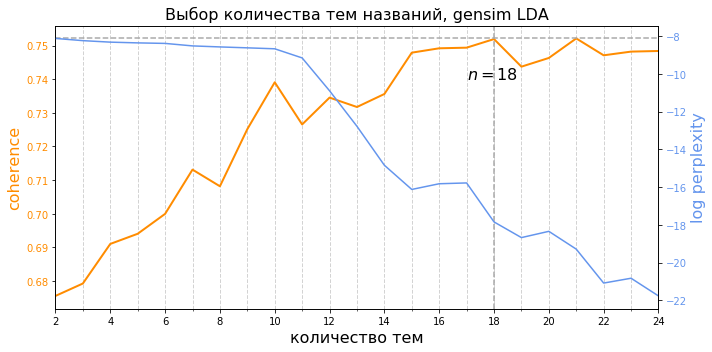

In [65]:
fig, ax1 = plt.subplots()

fig.set_size_inches(10,5)
x = range(start, limit, step)

color = 'darkorange'
ax1.set_xlabel('количество тем', fontsize=16)
ax1.set_ylabel('coherence', color=color, fontsize=16)
ax1.plot(x, backup_title_coherence_values, color=color, lw=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.text(17, 0.74, r'$n=18$', fontsize=16);

ax2 = ax1.twinx()
color = 'cornflowerblue'
ax2.set_ylabel('log perplexity', color=color, fontsize=16)
ax2.plot(x, backup_title_perplexity_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.axvline(x=18, color='darkgray', linestyle='--')
ax1.axhline(y=np.max(backup_title_coherence_values), color='darkgray', linestyle='--')

ax1.set_xlim(2,24)
ax1.set_xticks(range(2,25,2), minor=False)
ax1.set_xticks(range(3,25,2), minor=True)
ax1.grid(True, axis='x', which='both', color='lightgray', linestyle='--', linewidth=1)
plt.title('Выбор количества тем названий, gensim LDA', fontsize=16)
fig.tight_layout()
plt.show()

In [66]:
backup_title_model_7.show_topics(num_topics=7, num_words=10, formatted=True)

[(0,
  '0.055*"осень" + 0.028*"сон" + 0.014*"свой" + 0.013*"приходить" + 0.013*"мысль" + 0.013*"цветок" + 0.012*"песня" + 0.012*"сегодня" + 0.010*"наш" + 0.009*"край"'),
 (1,
  '0.032*"лето" + 0.023*"человек" + 0.022*"мир" + 0.021*"зима" + 0.017*"белый" + 0.017*"солнце" + 0.016*"друг" + 0.014*"дорога" + 0.014*"знать" + 0.013*"весенний"'),
 (2,
  '0.040*"жизнь" + 0.017*"утро" + 0.015*"август" + 0.013*"хотеть" + 0.013*"мама" + 0.012*"сказка" + 0.011*"пора" + 0.011*"путь" + 0.010*"сказать" + 0.009*"помнить"'),
 (3,
  '0.026*"весна" + 0.023*"небо" + 0.021*"жить" + 0.020*"свет" + 0.019*"снег" + 0.018*"окно" + 0.018*"бог" + 0.016*"дом" + 0.016*"год" + 0.014*"звезда"'),
 (4,
  '0.052*"любовь" + 0.030*"осенний" + 0.021*"твой" + 0.020*"это" + 0.017*"стих" + 0.016*"счастие" + 0.014*"поэт" + 0.013*"море" + 0.012*"просто" + 0.012*"мочь"'),
 (5,
  '0.034*"день" + 0.029*"ночь" + 0.015*"сердце" + 0.014*"весь" + 0.012*"птица" + 0.011*"лес" + 0.010*"судьба" + 0.010*"лист" + 0.010*"последний" + 0.009*"а

In [67]:
#text_gensim_model_list, text_gensim_coherence_values, text_gensim_perplexity_values = compute_coherence_values(
#   text_filtered_dictionary, text_corpus, text_bigram_list,
#   limit=limit, start=start, step=step
#)

In [68]:
#np.save('./metrics/text_gensim_coherence_values.npy', np.array(text_gensim_coherence_values))
#np.save('./metrics/text_gensim_perplexity_values.npy', np.array(text_gensim_perplexity_values))

In [69]:
#text_gensim_model_7 = text_gensim_model_list[5]
#text_gensim_model_9 = text_gensim_model_list[7]
#text_gensim_model_11 = text_gensim_model_list[9]

In [70]:
#save_gensim_model(text_gensim_model_7, 'text_gensim_model_7')
#save_gensim_model(text_gensim_model_9, 'text_gensim_model_9')
#save_gensim_model(text_gensim_model_11, 'text_gensim_model_11')

In [71]:
backup_text_gensim_coherence_values = np.load('./metrics/text_gensim_coherence_values.npy')
backup_text_gensim_perplexity_values = np.load('./metrics/text_gensim_perplexity_values.npy')

In [72]:
backup_text_gensim_model_7 = load_gensim_model('text_gensim_model_7')
backup_text_gensim_model_9 = load_gensim_model('text_gensim_model_9')
backup_text_gensim_model_11 = load_gensim_model('text_gensim_model_11')

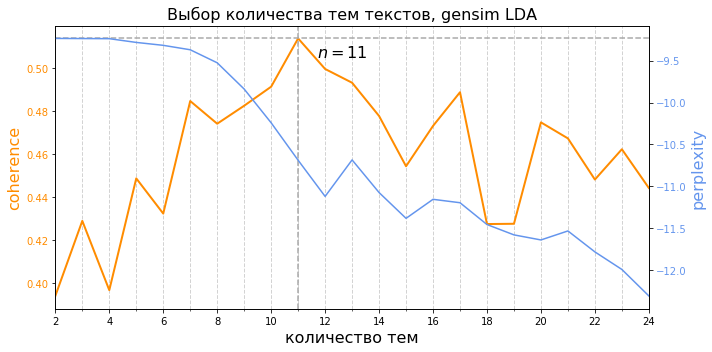

In [73]:
fig, ax1 = plt.subplots()

fig.set_size_inches(10,5)
x = range(start, limit, step)

color = 'darkorange'
ax1.set_xlabel('количество тем', fontsize=16)
ax1.set_ylabel('coherence', color=color, fontsize=16)
ax1.plot(x, backup_text_gensim_coherence_values, color=color, lw=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.text(11.7, 0.505, r'$n=11$', fontsize=16, ); # horizontalalignment='right'

ax2 = ax1.twinx()
color = 'cornflowerblue'
ax2.set_ylabel('perplexity', color=color, fontsize=16)
ax2.plot(x, backup_text_gensim_perplexity_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.axvline(x=11, color='darkgray', linestyle='--')
ax1.axhline(y=np.max(backup_text_gensim_coherence_values), color='darkgray', linestyle='--')

ax1.set_xlim(2,24)
ax1.set_xticks(range(2,25,2), minor=False)
ax1.set_xticks(range(3,25,2), minor=True)
ax1.grid(True, axis='x', which='both', color='lightgray', linestyle='--', linewidth=1)
plt.title('Выбор количества тем текстов, gensim LDA', fontsize=16)
fig.tight_layout()
plt.show()

In [74]:
backup_text_gensim_model_9.show_topics(num_topics=9, num_words=10, formatted=True)

[(0,
  '0.007*"ева" + 0.005*"кукла" + 0.004*"король" + 0.003*"путин" + 0.003*"королева" + 0.003*"яблоня" + 0.003*"смертельный" + 0.002*"надевать" + 0.002*"стул" + 0.002*"империя"'),
 (1,
  '0.005*"собака" + 0.004*"пребывать" + 0.004*"трепать" + 0.003*"погулять" + 0.003*"горох" + 0.003*"разгораться" + 0.003*"29" + 0.003*"проем" + 0.003*"приближать" + 0.003*"зрелость"'),
 (2,
  '0.007*"море" + 0.004*"сон" + 0.004*"вода" + 0.004*"день" + 0.004*"волна" + 0.003*"небо" + 0.003*"ночь" + 0.003*"луна" + 0.003*"весь" + 0.003*"берег"'),
 (3,
  '0.005*"это" + 0.005*"который" + 0.004*"работа" + 0.004*"русский" + 0.003*"2" + 0.003*"автор" + 0.003*"россия" + 0.003*"страна" + 0.003*"поэт" + 0.003*"1"'),
 (4,
  '0.012*"весь" + 0.011*"свой" + 0.011*"это" + 0.009*"жизнь" + 0.008*"любовь" + 0.007*"душа" + 0.007*"мочь" + 0.006*"человек" + 0.006*"знать" + 0.006*"твой"'),
 (5,
  '0.009*"небо" + 0.007*"ветер" + 0.006*"ночь" + 0.005*"солнце" + 0.005*"свет" + 0.005*"день" + 0.005*"окно" + 0.005*"осень" + 0.004*

In [75]:
import os

In [76]:
os.environ.update({'MALLET_HOME':r'd:/mallet-2.0.8/'})

In [77]:
def compute_mallet_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    mallet_path = 'D:/mallet-2.0.8/bin/mallet'
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        t0 = time.perf_counter()
        mallet_model = models.wrappers.LdaMallet(
            mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary,
            workers=7
        )
        gensim_model = models.wrappers.ldamallet.malletmodel2ldamodel(mallet_model)
        model_list.append(mallet_model)
        coherencemodel = models.CoherenceModel(model=gensim_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_values.append(gensim_model.log_perplexity(corpus))
        print(f'num_topics={num_topics}, time_elapsed {(time.perf_counter() - t0):.3f}')

    return model_list, coherence_values, perplexity_values

In [78]:
#text_mallet_model_list, text_mallet_coherence_values, text_mallet_perplexity_values = compute_coherence_values(
#   text_filtered_dictionary, text_corpus, text_bigram_list,
#   limit=limit, start=start, step=step
#)

In [79]:
#np.save('./metrics/text_mallet_coherence_values.npy', np.array(text_mallet_coherence_values))
#np.save('./metrics/text_mallet_perplexity_values.npy', np.array(text_mallet_perplexity_values))

In [80]:
#text_mallet_model_7 = text_mallet_model_list[5]
#text_mallet_model_9 = text_mallet_model_list[7]
#text_mallet_model_11 = text_mallet_model_list[9]

In [81]:
#save_gensim_model(text_mallet_model_7, 'text_mallet_model_7')
#save_gensim_model(text_mallet_model_9, 'text_mallet_model_9')
#save_gensim_model(text_mallet_model_11, 'text_mallet_model_11')

In [82]:
backup_text_mallet_coherence_values = np.load('./metrics/text_mallet_coherence_values.npy')
backup_text_mallet_perplexity_values = np.load('./metrics/text_mallet_perplexity_values.npy')

In [83]:
backup_text_mallet_model_7 = load_gensim_model('text_mallet_model_7')
backup_text_mallet_model_9 = load_gensim_model('text_mallet_model_9')
backup_text_mallet_model_11 = load_gensim_model('text_mallet_model_11')

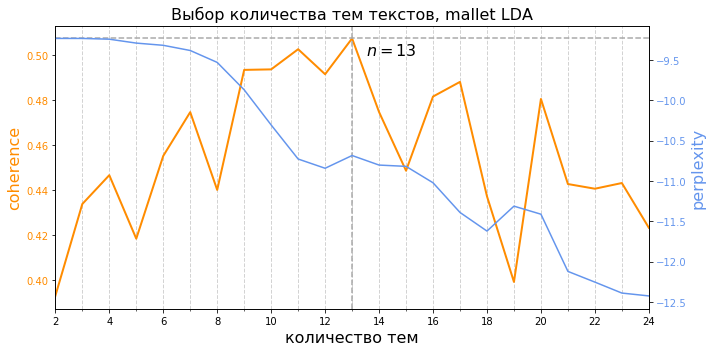

In [84]:
fig, ax1 = plt.subplots()

fig.set_size_inches(10,5)
x = range(start, limit, step)

color = 'darkorange'
ax1.set_xlabel('количество тем', fontsize=16)
ax1.set_ylabel('coherence', color=color, fontsize=16)
ax1.plot(x, backup_text_mallet_coherence_values, color=color, lw=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.text(13.5, 0.50, r'$n=13$', fontsize=16, ); # horizontalalignment='right'

ax2 = ax1.twinx()
color = 'cornflowerblue'
ax2.set_ylabel('perplexity', color=color, fontsize=16)
ax2.plot(x, backup_text_mallet_perplexity_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.axvline(x=13, color='darkgray', linestyle='--')
ax1.axhline(y=np.max(backup_text_mallet_coherence_values), color='darkgray', linestyle='--')

ax1.set_xlim(2,24)
ax1.set_xticks(range(2,25,2), minor=False)
ax1.set_xticks(range(3,25,2), minor=True)
ax1.grid(True, axis='x', which='both', color='lightgray', linestyle='--', linewidth=1)
plt.title('Выбор количества тем текстов, mallet LDA', fontsize=16)
fig.tight_layout()
plt.show()

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [86]:
text_bodies = working_data['text'].apply(lambda string_list: ' '.join(string_list))

In [87]:
len(text_bodies)

22782

In [88]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, max_features=1000, ngram_range=(1,2))
tfidf = tfidf_vectorizer.fit_transform(text_bodies)

tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=1000, ngram_range=(1,2))
tf = tf_vectorizer.fit_transform(text_bodies)

tf_feature_names = tf_vectorizer.get_feature_names()
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

n_top_words = 20

In [89]:
#text_sk_lda_perplexity_values = []
#text_sk_lda_coherence_values = []

#text_sk_nmf_coherence_values = []
#text_sk_nmf_error_values = []

#sk_lda_models = []
#sk_nmf_models = []

#for num_topics in range(start, limit, step):
#    t0 = time.perf_counter()
#        
#    lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,
#                                    learning_method='online', 
#                                    evaluate_every=2, random_state=1020, n_jobs=-1).fit(tf)
#    text_sk_lda_perplexity_values.append(lda.perplexity(tf))    
#    tokenized_topics = []
#    for topic_word_counts in lda.components_:    
#        topic_tokens= [i for i in topic_word_counts.argsort()[:-n_top_words - 1:-1]]
#        tokenized_topics.append(topic_tokens)
#    coherencemodel = models.CoherenceModel(
#        topics=tokenized_topics, texts=text_bigram_list, dictionary=text_filtered_dictionary,
#        topn=n_top_words, coherence='c_v'
#    )
#    text_sk_lda_coherence_values.append(coherencemodel.get_coherence())
#    sk_lda_models.append(lda)
#        
#    nmf = NMF(n_components=num_topics, random_state=1020,
#              alpha=.1, l1_ratio=.5).fit(tfidf)
#    text_sk_nmf_error_values.append(nmf.reconstruction_err_)
#    tokenized_topics = []
#    for topic_word_counts in nmf.components_:        
#        topic_tokens= [i for i in topic_word_counts.argsort()[:-n_top_words - 1:-1]]
#        tokenized_topics.append(topic_tokens)
#    coherencemodel = models.CoherenceModel(
#            topics=tokenized_topics, texts=text_bigram_list, dictionary=text_filtered_dictionary,
#            topn=n_top_words, coherence='c_v'
#        )
#    text_sk_nmf_coherence_values.append(coherencemodel.get_coherence())
#    sk_nmf_models.append(nmf)
#        
#    print(f'n={num_topics}, time elapsed {(time.perf_counter() - t0):.3f} s')

In [90]:
#np.save('./metrics/text_sk_lda_perplexity_values.npy', np.array(text_sk_lda_perplexity_values))
#np.save('./metrics/text_sk_lda_coherence_values.npy', np.array(text_sk_lda_coherence_values))

#np.save('./metrics/text_sk_nmf_error_values.npy', np.array(text_sk_nmf_error_values))
#np.save('./metrics/text_sk_nmf_coherence_values.npy', np.array(text_sk_nmf_coherence_values))

In [91]:
backup_text_sk_lda_perplexity_values = np.load('./metrics/text_sk_lda_perplexity_values.npy')
backup_text_sk_lda_coherence_values = np.load('./metrics/text_sk_lda_coherence_values.npy')

backup_text_sk_nmf_error_values = np.load('./metrics/text_sk_nmf_error_values.npy')
backup_text_sk_nmf_coherence_values = np.load('./metrics/text_sk_nmf_coherence_values.npy')

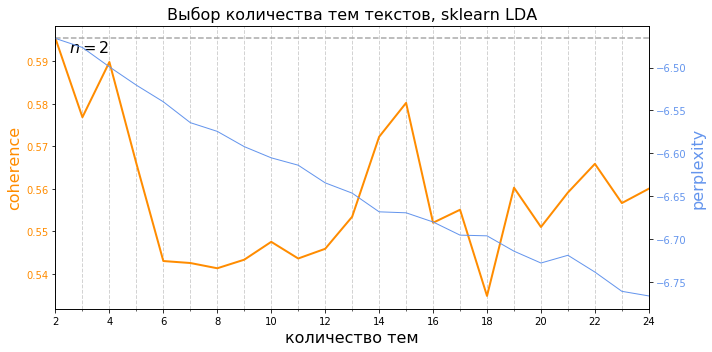

In [92]:
fig, ax1 = plt.subplots()

fig.set_size_inches(10,5)
x = range(start, limit, step)

color = 'darkorange'
ax1.set_xlabel('количество тем', fontsize=16)
ax1.set_ylabel('coherence', color=color, fontsize=16)
ax1.plot(x, backup_text_sk_lda_coherence_values, color=color, lw=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.text(2.5, 0.592, r'$n=2$', fontsize=16, );

ax2 = ax1.twinx()
color = 'cornflowerblue'
ax2.set_ylabel('perplexity', color=color, fontsize=16)
ax2.plot(x, -np.log(backup_text_sk_lda_perplexity_values), color=color, lw=1)
ax2.tick_params(axis='y', labelcolor=color)

ax1.axvline(x=2, color='darkgray', linestyle='--')
ax1.axhline(y=np.max(backup_text_sk_lda_coherence_values), color='darkgray', linestyle='--')

ax1.set_xlim(2,24)
ax1.set_xticks(range(2,25,2), minor=False)
ax1.set_xticks(range(3,25,2), minor=True)
ax1.grid(True, axis='x', which='both', color='lightgray', linestyle='--', linewidth=1)
plt.title('Выбор количества тем текстов, sklearn LDA', fontsize=16)
fig.tight_layout()
plt.show()

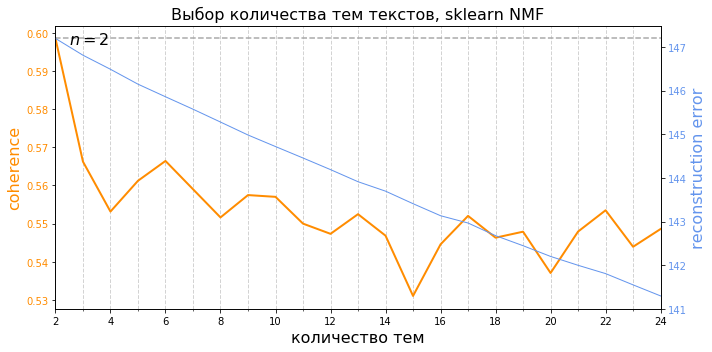

In [93]:
fig, ax1 = plt.subplots()

fig.set_size_inches(10,5)
x = range(start, limit, step)

color = 'darkorange'
ax1.set_xlabel('количество тем', fontsize=16)
ax1.set_ylabel('coherence', color=color, fontsize=16)
ax1.plot(x, backup_text_sk_nmf_coherence_values, color=color, lw=2)
ax1.tick_params(axis='y', labelcolor=color)
plt.text(2.5, 0.597, r'$n=2$', fontsize=16, );

ax2 = ax1.twinx()
color = 'cornflowerblue'
ax2.set_ylabel('reconstruction error', color=color, fontsize=16)
ax2.plot(x, backup_text_sk_nmf_error_values, color=color, lw=1)
ax2.tick_params(axis='y', labelcolor=color)

ax1.axvline(x=2, color='darkgray', linestyle='--')
ax1.axhline(y=np.max(backup_text_sk_nmf_coherence_values), color='darkgray', linestyle='--')

ax1.set_xlim(2,24)
ax1.set_xticks(range(2,25,2), minor=False)
ax1.set_xticks(range(3,25,2), minor=True)
ax1.grid(True, axis='x', which='both', color='lightgray', linestyle='--', linewidth=1)
plt.title('Выбор количества тем текстов, sklearn NMF', fontsize=16)
fig.tight_layout()
plt.show()

In [94]:
#text_sk_lda_model_2 = sk_lda_models[0]
#text_sk_lda_model_4 = sk_lda_models[2]


#text_sk_nmf_model_2 = sk_nmf_models[0]
#text_sk_nmf_model_6 = sk_nmf_models[4]

In [95]:
#pickle.dump(text_sk_lda_model_2, open('./models/text_sk_lda_model_2', 'wb'))
#pickle.dump(text_sk_lda_model_4, open('./models/text_sk_lda_model_4', 'wb'))

#pickle.dump(text_sk_nmf_model_2, open('./models/text_sk_nmf_model_2', 'wb'))
#pickle.dump(text_sk_nmf_model_6, open('./models/text_sk_nmf_model_6', 'wb'))

In [96]:
backup_text_sk_lda_model_2 = pickle.load(open('./models/text_sk_lda_model_2', 'rb'))
backup_text_sk_lda_model_4 = pickle.load(open('./models/text_sk_lda_model_4', 'rb'))

backup_text_sk_nmf_model_2 = pickle.load(open('./models/text_sk_nmf_model_2', 'rb'))
backup_text_sk_nmf_model_6 = pickle.load(open('./models/text_sk_nmf_model_6', 'rb'))

In [97]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [98]:
n_top_words = 10

In [99]:
print_top_words(backup_text_sk_lda_model_4, tf_feature_names, n_top_words)

Topic #0: весь это свой жизнь человек мочь знать жить год друг
Topic #1: любовь душа твой сердце небо свет мир жизнь весь море
Topic #2: день ночь сон твой уходить время год это снова глаз
Topic #3: небо снег белый ветер дом солнце город окно земля весна



In [100]:
print_top_words(backup_text_sk_nmf_model_6, tf_feature_names, n_top_words)

Topic #0: это весь свой жизнь мочь человек знать жить наш становиться
Topic #1: небо снег ветер солнце дождь окно белый осень свет сон
Topic #2: любовь душа сердце любить счастие жизнь чувство пусть лишь вновь
Topic #3: твой глаз губа рука слово голос взгляд сердце сон хотеть
Topic #4: друг друг друг круг враг наш вместе подруга встреча любить милый
Topic #5: день год ночь каждый новый каждый день утро рождение тень проходить



<div class="alert alert-block alert-danger">
<b>Однозначно определиться с количеством тем не удалось.</b>
</div>

<div class="alert alert-block alert-warning">
    <p>Зависимости coherence от количества тем для моделей LDA от <b>gensim</b> показываут максимум на значениях <b>7</b> и <b>11</b>.</p>
    <p>Зависимости coherence от количества тем для моделей LDA от <b>mallet</b> показываут максимум на значениях <b>7</b>, <b>9</b>, <b>11</b> и <b>13</b>.</p>
    <p>Модели LDA и NMF от <b>sklearn</b> показали наибольшие значения coherence. Зависимости coherence от количества тем имеют максимумы на значениях <b>2</b>, <b>4</b> и <b>6</b>.</p>
<p>Далее проведём анализ ключвых слов различных разбиений и соответствующих текстов и определимся с окончательным количеством тем и их содержанием.</p>
</div>

## 4. Визуализация разбиения текстов на темы

In [101]:
import pyLDAvis.gensim

In [102]:
#pyLDAvis.enable_notebook()

In [103]:
#gensim_7_vis = pyLDAvis.gensim.prepare(topic_model=backup_text_gensim_model_7, corpus=text_corpus, dictionary=text_filtered_dictionary, n_jobs=7)

In [104]:
#pickle.dump(gensim_7_vis, open('./pyldavis/gensim_7_vis', 'wb'))

In [105]:
backup_gensim_7_vis = pickle.load(open('./pyldavis/gensim_7_vis', 'rb'))

<div class="alert alert-block alert-info">Визуализация модели <b>gensim LDA</b>. Количество тем - <b>7</b></div>

In [106]:
pyLDAvis.display(backup_gensim_7_vis)

In [107]:
#gensim_9_vis = pyLDAvis.gensim.prepare(topic_model=backup_text_gensim_model_9, corpus=text_corpus, dictionary=text_filtered_dictionary, n_jobs=7)

In [108]:
#pickle.dump(gensim_9_vis, open('./pyldavis/gensim_9_vis', 'wb'))

In [109]:
backup_gensim_9_vis = pickle.load(open('./pyldavis/gensim_9_vis', 'rb'))

<div class="alert alert-block alert-info">Визуализация модели <b>gensim LDA</b>. Количество тем - <b>9</b></div>

In [110]:
pyLDAvis.display(backup_gensim_9_vis)

In [111]:
#gensim_11_vis = pyLDAvis.gensim.prepare(topic_model=backup_text_gensim_model_11, corpus=text_corpus, dictionary=text_filtered_dictionary, n_jobs=7)

In [112]:
#pickle.dump(gensim_11_vis, open('./pyldavis/gensim_11_vis', 'wb'))

In [113]:
backup_gensim_11_vis = pickle.load(open('./pyldavis/gensim_11_vis', 'rb'))

<div class="alert alert-block alert-info">Визуализация модели <b>gensim LDA</b>. Количество тем - <b>11</b></div>

In [114]:
pyLDAvis.display(backup_gensim_11_vis)

In [115]:
#mallet_7_vis = pyLDAvis.gensim.prepare(topic_model=backup_text_mallet_model_7, corpus=text_corpus, dictionary=text_filtered_dictionary, n_jobs=7)

In [116]:
#pickle.dump(mallet_7_vis, open('./pyldavis/mallet_7_vis', 'wb'))

In [117]:
backup_mallet_7_vis = pickle.load(open('./pyldavis/mallet_7_vis', 'rb'))

<div class="alert alert-block alert-info">Визуализация модели <b>mallet LDA</b>. Количество тем - <b>7</b></div>

In [118]:
pyLDAvis.display(backup_mallet_7_vis)

In [119]:
#mallet_9_vis = pyLDAvis.gensim.prepare(topic_model=backup_text_mallet_model_9, corpus=text_corpus, dictionary=text_filtered_dictionary, n_jobs=7)

In [120]:
#pickle.dump(mallet_9_vis, open('./pyldavis/mallet_9_vis', 'wb'))

In [121]:
backup_mallet_9_vis = pickle.load(open('./pyldavis/mallet_9_vis', 'rb'))

<div class="alert alert-block alert-info">Визуализация модели <b>mallet LDA</b>. Количество тем - <b>9</b></div>

In [122]:
pyLDAvis.display(backup_mallet_9_vis)

In [123]:
#mallet_11_vis = pyLDAvis.gensim.prepare(topic_model=backup_text_mallet_model_11, corpus=text_corpus, dictionary=text_filtered_dictionary, n_jobs=7)

In [124]:
#pickle.dump(mallet_11_vis, open('./pyldavis/mallet_11_vis', 'wb'))

In [125]:
backup_mallet_11_vis = pickle.load(open('./pyldavis/mallet_11_vis', 'rb'))

<div class="alert alert-block alert-info">Визуализация модели <b>mallet LDA</b>. Количество тем - <b>11</b></div>

In [126]:
pyLDAvis.display(backup_mallet_11_vis)

In [127]:
import pyLDAvis.sklearn

In [128]:
#sk_lda_2_vis = pyLDAvis.sklearn.prepare(backup_text_sk_lda_model_2, tf, tf_vectorizer)

In [129]:
#pickle.dump(sk_lda_2_vis, open('./pyldavis/sk_lda_2_vis', 'wb'))

In [130]:
backup_sk_lda_2_vis = pickle.load(open('./pyldavis/sk_lda_2_vis', 'rb'))

<div class="alert alert-block alert-info">Визуализация модели <b>sklearn LDA</b>. Количество тем - <b>2</b></div>

In [131]:
pyLDAvis.display(backup_sk_lda_2_vis)

In [132]:
#sk_lda_4_vis = pyLDAvis.sklearn.prepare(backup_text_sk_lda_model_4, tf, tf_vectorizer)

In [133]:
#pickle.dump(sk_lda_4_vis, open('./pyldavis/sk_lda_4_vis', 'wb'))

In [134]:
backup_sk_lda_4_vis = pickle.load(open('./pyldavis/sk_lda_4_vis', 'rb'))

<div class="alert alert-block alert-info">Визуализация модели <b>sklearn LDA</b>. Количество тем - <b>4</b></div>

In [135]:
pyLDAvis.display(backup_sk_lda_4_vis)

<div class="alert alert-block alert-danger">    
    <p><b>Анализ разбиений на темы разными моделями показывает, что получить осмысленное разбиение какой-то одной моделью не удаётся.</b></p>
</div>

<div class="alert alert-block alert-warning">
    <p>Для окончательного разбиения на осмысленные темы предлагается использовать наиболее адекватные классификации из разных моделей.</p>
    <p><b>Важно, что в разных моделях выделились некоторые общие темы с примерно одинаковыми наборами ключевых слов.</b></p>
    <p>Эти общие темы сведены в таблицу.</p>
    <hr>
    <table>
        <tr style="border-bottom:1px solid black">
            <th scope="col">модель</th>
            <th scope="col">индекс темы pyLDAvis</th>
            <th scope="col">наиболее характерные ключевые слова</th>
            <th scope="col">предполагаемое содержание</th>
        </tr>
<!--Любовь, смысл жизни-->                
        <tr>
            <td>gensim_7</td>
            <td>1</td>
            <td>жизнь, мочь, человек, любовь, душа, жить, знать, становиться, любить, мир, понимать, говорить, сердце, время, судьба</td>
            <td>Любовь, смысл жизни</td>
        </tr>
        <tr>
            <td>gensim_9</td>
            <td>1</td>
            <td>жизнь, любовь, человек, душа, знать, жить, становиться, любить, мир, сердце, слово, понимать, время, счастие</td>
            <td>Любовь, смысл жизни</td>
        </tr>
        <tr>
            <td>mallet_7</td>
            <td>1</td>
            <td>жизнь, мочь, человек, душа, любовь, жить, знать, становиться, мир, любить, слово, сказать, Бог, время, понимать</td>
            <td>Любовь, смысл жизни</td>
        </tr>
        <tr>
            <td>mallet_9</td>
            <td>1</td>
            <td>жизнь, любовь, человек, знать, душа, жить, любить, мир, сказать, говорить, понимать, слово, сердце, время, судьба</td>
            <td>Любовь, смысл жизни</td>
        </tr>
        <tr style="border-bottom:1px solid black">
            <td>sklearn_4</td>
            <td>1</td>
            <td>человек, жизнь, мочь, друг, жить, знать, Бог, год, сказать, понимать, слово, дело, любить, мир, время</td>
            <td>Любовь, смысл жизни</td>
        </tr>        
<!--Природа, погода, времена года-->
        <tr>
            <td>gensim_7</td>
            <td>2</td>
            <td>ветер, весна, небо, осень, солнце, ночь, день, дождь, зима, лето, снег, утро, тепло, звезда, море, лист, луна, вода, птица, свет, тишина, трава</td>
            <td>Природа, погода, времена года</td>
        </tr>
        <tr>
            <td>gensim_9</td>
            <td>2</td>
            <td>небо, ветер, солнце, осень, дождь, окно, ночь, лето, снег, свет, весна, день, зима, вода, земля, облако, лист, звезда, сад, тишина, птица, утро, лес</td>
            <td>Природа, погода, времена года</td>
        </tr>
        <tr>
            <td>mallet_7</td>
            <td>2</td>
            <td>небо, ночь, день, ветер, солнце, весна, осень, зима, дождь, снег, свет, утро, лето, земля, тепло, звезда</td>
            <td>Природа, погода, времена года</td>
        </tr>
        <tr>
            <td>mallet_9</td>
            <td>2</td>
            <td>небо, ветер, вода, свет, солнце, облако, лист, сад, тень, река, земля, тишина, лето, ночь, воздух, поле, лететь, волна, крыло, осень, дождь, звезда, лес, трава, огонь</td>
            <td>Природа, погода, времена года</td>
        </tr>
        <tr style="border-bottom:1px solid black">
            <td>sklearn_4</td>
            <td>2</td>
            <td>снег, небо, ветер, лес, зима, лист, весна, трава, осень, облако, солнце, птица, лето, земля, дождь, вода, сад, поле, листва, дерево</td>
            <td>Природа, погода, времена года</td>
        </tr>
<!--О детях, для детей-->        
        <tr>
            <td>gensim_7</td>
            <td>4</td>
            <td>мама, кот, кошка, дом, дед, папа, сосед, работа, собака, пес, бабушка, обед, гриб, гость, нос, медведь, корова, утро, деревня</td>
            <td>О детях, для детей</td>
        </tr>
        <tr>
            <td>gensim_11</td>
            <td>3</td>
            <td>мама, кот, кошка, дом, двор, чай, утро, пес, собака, окно, дождик, гриб, сосед, крыша, лес, хвост, нога, стол, медведь, мышь, кровать</td>
            <td>О детях, для детей</td>
        </tr>
        <tr>
            <td>mallet_9</td>
            <td>4</td>
            <td>мама, дед, кошка, кот, папа, собака, работа, сосед, бабушка, дом, пес, обед, баба, пол, стол, деревня, корова, гость, хозяин, гриб, старик, дочка</td>
            <td>О детях, для детей</td>
        </tr>        
        <tr style="border-bottom:1px solid black">
            <td>mallet_11</td>
            <td>5</td>
            <td>мама, кошка, дождик, чай, гриб, зонт, папа, двор, сосед, крошка, пирог, печка, рыбка, подружка</td>
            <td>О детях, для детей</td>
        </tr>
<!--Другие языки-->        
        <tr>
            <td>gensim_7</td>
            <td>5</td>
            <td>Христос, and, i, the, a, to, Иисус, мытарство, of, означать, куртка, очаг, in, Спаситель, большинство, бабий_яр, you, Иисус Христос, программа, me, православный, my, теребить, de, разлюблять, поспешить, молодежь, хвостик, зорька, that</td>
            <td>Другие языки</td>
        </tr>
        <tr>
            <td>gensim_9</td>
            <td>6</td>
            <td>кот, and, i, медведь, the, a, to, of, одуванчик, мишка, раскрашивать, in, you, клок, пята, me, de, нынешний, my, лошадка, арбуз, поступь, дождинка, дед_мороз, девять, котик, цветочный, that, восьмой, for</td>
            <td>Другие языки</td>
        </tr>
        <tr>
            <td>mallet_7</td>
            <td>5</td>
            <td>and, i, the, to, a, галактика, скоро_осень, перевод, куртка, очаг, of, me, никто_знать, визг, in, убирать, означать, кремль, большинство, you, Иисус Христос, de, зорька, Ленин, суп, окликать, my, разрываться, поспешить</td>
            <td>Другие языки</td>
        </tr>        
        <tr style="border-bottom:1px solid black">
            <td>mallet_11</td>
            <td>7</td>
            <td>кот, зима, and, елка, the, i, a, to, медведь, март, мороз, of, новый_год, дымок, сугроб, in, котенок, созерцать, мишка, снег, крыса, октябрь, шапка, you, me, клок, як, серость</td>
            <td>Другие языки</td>
        </tr>        
</table>
</div>

## 5. Интерпретация тем, выделенных моделями

<div class='alert block-alert alert-info'>
    <p>Сопоставим ключевые слова выделенных тем со смысловым содержанием текстов, отнесённых к той или иной теме.</p>
    <p><b>Темой</b> документа будем считать ту, которой модель присвоила <b>наибольшую вероятность</b> принадлежности.
</div>

In [136]:
def get_document_topics_gensim(gensim_model, corpus, texts, topics_per_document=1):
    '''
    Работает с моделями gensim!
    Для каждого документа определяем наиболее вероятные темы,
    возвращаем DataFrame содержащий тексты, индексы тем, ключевые слова тем, вероятности принадлежности к темам
    '''
    # результирующий список, содержащая тексты, помеченные индексами наиболее вероятных тем
    labeled_documents_list = []

    # распределения вероятностей тем в каждом документе
    topic_probabilities = gensim_model[corpus]
    # выделление индексов наиболее вероятных тем для каждого документа
    for topic_proba_pairs in topic_probabilities:
        # topic_proba_pairs[0] - кортежи (индекс_темы, вероятность_темы)
        # сортируем темы по убыванию вероятностей
        topic_proba_pairs = sorted(topic_proba_pairs[0], key=lambda x: (x[1]), reverse=True)
        # отсавляем topics_per_document наиболее вероятных тем
        if len(topic_proba_pairs) > topics_per_document:
            topic_proba_pairs = topic_proba_pairs[:topics_per_document]
        topic_indices = []
        topic_probabilities = []
        topic_keywords=[]
        for topic_idx, probability in topic_proba_pairs:
            # ключевые слова темы с вероятностями
            word_proba = gensim_model.show_topic(topic_idx)
            # соединяем ключевые слова в одну строку
            keywords = ", ".join([word for word, proba in word_proba])            
            if 1==topics_per_document:
                topic_indices=int(topic_idx)
                topic_probabilities=round(probability, 3)
                topic_keywords=keywords
            else:
                topic_indices.append(int(topic_idx))
                topic_probabilities.append(round(probability, 3))
                topic_keywords.append(keywords)
        # добавляем в общий список новый элемент, содержащий список индексов тем, список вероятностей тем и список ключевых слов
        labeled_documents_list.append([topic_indices, topic_probabilities, topic_keywords])
        
    # формируем таблицу, присваиваем имена колонкам
    labeled_documents_df = pd.DataFrame(labeled_documents_list)
    labeled_documents_df.columns = ['topic_index', 'topic_proba', 'topic_keywords']

    # добавляем к таблице исходные тексты
    contents = pd.Series(texts)
    labeled_documents_df = pd.concat([labeled_documents_df, contents], axis=1)
    return labeled_documents_df

In [137]:
def get_document_topics_sklearn(sklearn_model, term_freq_matrix, feature_names, texts, n_top_words=10, topics_per_document=1):
    '''
    Работает с моделями sklearn!
    Для каждого документа определяем наиболее вероятные темы,
    возвращаем DataFrame содержащий тексты, индексы тем, ключевые слова тем, вероятности принадлежности к темам.    
    '''
    # результирующий список, содержащий тексты, помеченные индексами наиболее вероятных тем
    labeled_documents_list = []

    # распределения вероятностей тем в каждом документе
    topic_probabilities = sklearn_model.transform(term_freq_matrix)    
    topic_top_words = []
    # Проходим по темам, берём распределения вероятностей слов в теме
    for component_probabilities in sklearn_model.components_:
        # соединяем ключевые слова в одну строку
        top_words = ", ".join([feature_names[idx] for idx in component_probabilities.argsort()[:-n_top_words - 1:-1]])        
        topic_top_words.append(top_words)
    
    # выделение индексов наиболее вероятных тем для каждого документа
    for document_dictribution in topic_probabilities:        
        topic_proba_pairs = [item for item in enumerate(document_dictribution)]        
        # сортируем темы по убыванию вероятностей
        topic_proba_pairs = sorted(topic_proba_pairs, key=lambda x: (x[1]), reverse=True)
        # отсавляем topics_per_document наиболее вероятных тем
        if len(topic_proba_pairs) > topics_per_document:
            topic_proba_pairs = topic_proba_pairs[:topics_per_document]
        topic_indices = []
        topic_probabilities = []
        topic_keywords=[]
        for topic_idx, probability in topic_proba_pairs:
            # распределение вероятностей слов в теме
            component_probabilities = sklearn_model.components_[topic_idx]
            # соединяем ключевые слова в одну строку
            keywords = topic_top_words[topic_idx]
            if 1==topics_per_document:
                topic_indices=int(topic_idx)
                topic_probabilities=round(probability, 3)
                topic_keywords=keywords
            else:
                topic_indices.append(int(topic_idx))
                topic_probabilities.append(round(probability, 3))
                topic_keywords.append(keywords)
        # добавляем в общий список новый элемент, содержащий список индексов тем, список вероятностей тем и список ключевых слов
        labeled_documents_list.append([topic_indices, topic_probabilities, topic_keywords])
        
    # формируем таблицу, присваиваем имена колонкам
    labeled_documents_df = pd.DataFrame(labeled_documents_list)
    labeled_documents_df.columns = ['topic_index', 'topic_proba', 'topic_keywords']

    # добавляем к таблице исходные тексты
    contents = pd.Series(texts)
    labeled_documents_df = pd.concat([labeled_documents_df, contents], axis=1)
    return labeled_documents_df

In [138]:
def show_text_topic_keywords(labeled_texts_df, item_idx):
    print('topic index: ', labeled_texts_df.iloc[item_idx]['topic_index'])
    print('topic keywords: ', labeled_texts_df.iloc[item_idx]['topic_keywords'])
    print('topic probability: ', labeled_texts_df.iloc[item_idx]['topic_proba'])
    print(labeled_texts_df.iloc[item_idx]['text'])

<div class='alert block-alert alert-info'>
    <p>Для каждой модели составим таблицу с текстами (документами), которым сопоставлен индекс темы, вероятность принадлежности к ней и ключевые слова темы.</p>
</div>

In [139]:
#gensim_7_labeled_texts = get_document_topics_gensim(gensim_model=backup_text_gensim_model_7, corpus=text_corpus, texts=raw_data['text'], topics_per_document=1)

In [140]:
#gensim_7_labeled_texts.to_pickle('./data/gensim_7_labeled_texts.pkl')

In [141]:
backup_gensim_7_labeled_texts = pd.read_pickle('./data/gensim_7_labeled_texts.pkl')

In [142]:
backup_gensim_7_labeled_texts

,topic_index,topic_proba,topic_keywords,text
0,2,0.669,"небо, день, ночь, ветер, солнце, осень, душа, ...","\nКак тридцать три стукнет,\nкорыто отдам закл..."
1,4,0.727,"весь, свой, это, жизнь, мочь, душа, любовь, че...","\nВот улица есть и на ней есть прохожий,\nв од..."
2,2,0.639,"небо, день, ночь, ветер, солнце, осень, душа, ...","\nМы раньше песни пели,\nНам было не до сна -\..."
3,2,0.648,"небо, день, ночь, ветер, солнце, осень, душа, ...",\n ***\nСтоят деревья без листвы...\nП...
4,4,0.341,"весь, свой, это, жизнь, мочь, душа, любовь, че...",\nШирли Мэнсон в красном халате \nШастает по б...
...,...,...,...,...
22777,4,0.884,"весь, свой, это, жизнь, мочь, душа, любовь, че...",\n18.10.19 “ Русский космизм – это ваши сани ...
22778,4,0.826,"весь, свой, это, жизнь, мочь, душа, любовь, че...","\nИм нужно чуть больше внимания, \nИ несколько..."
22779,2,0.871,"небо, день, ночь, ветер, солнце, осень, душа, ...",\nрусский вариант текста песни Ghost of a Rose...
22780,2,0.524,"небо, день, ночь, ветер, солнце, осень, душа, ...",\nОгромный шар закатного светила\nОкрасил снег...


In [143]:
#gensim_9_labeled_texts = get_document_topics_gensim(gensim_model=backup_text_gensim_model_9, corpus=text_corpus, texts=raw_data['text'], topics_per_document=1)

In [144]:
#gensim_9_labeled_texts.to_pickle('./data/gensim_9_labeled_texts.pkl')

In [145]:
backup_gensim_9_labeled_texts = pd.read_pickle('./data/gensim_9_labeled_texts.pkl')

In [146]:
show_text_topic_keywords(backup_gensim_9_labeled_texts, 869)

topic index:  5
topic keywords:  небо, ветер, ночь, солнце, свет, день, окно, осень, дождь, лето
topic probability:  0.5989999771118164

Над рекой Угрой туманом
Утро летнее встаёт,
Словно сказочным дурманом
Одаряет здесь народ.

На воде туман молочный,
Отражаясь в этот час,
Чистый, белый, непорочный,
Умывает видом нас.

Час пройдёт – и он растает,
А пока, как дым, висит
И собою размывает
Берегов прелестный вид.

Но не будем обижаться –
Чрез прозрачную вуаль
Взор сумел до них пробраться
И спешит в лесную даль.

29 декабря 2016 г.



In [147]:
#gensim_11_labeled_texts = get_document_topics_gensim(gensim_model=backup_text_gensim_model_11, corpus=text_corpus, texts=raw_data['text'], topics_per_document=1)

In [148]:
#gensim_11_labeled_texts.to_pickle('./data/gensim_11_labeled_texts.pkl')

In [149]:
backup_gensim_11_labeled_texts = pd.read_pickle('./data/gensim_11_labeled_texts.pkl')

In [150]:
#mallet_7_labeled_texts = get_document_topics_gensim(gensim_model=backup_text_mallet_model_7, corpus=text_corpus, texts=raw_data['text'], topics_per_document=1)

In [151]:
#mallet_7_labeled_texts.to_pickle('./data/mallet_7_labeled_texts.pkl')

In [152]:
backup_mallet_7_labeled_texts = pd.read_pickle('./data/mallet_7_labeled_texts.pkl')

In [153]:
#mallet_9_labeled_texts = get_document_topics_gensim(gensim_model=backup_text_mallet_model_9, corpus=text_corpus, texts=raw_data['text'], topics_per_document=1)

In [154]:
#mallet_9_labeled_texts.to_pickle('./data/mallet_9_labeled_texts.pkl')

In [155]:
backup_mallet_9_labeled_texts = pd.read_pickle('./data/mallet_9_labeled_texts.pkl')

In [156]:
#mallet_11_labeled_texts = get_document_topics_gensim(gensim_model=backup_text_mallet_model_11, corpus=text_corpus, texts=raw_data['text'], topics_per_document=1)

In [157]:
#mallet_11_labeled_texts.to_pickle('./data/mallet_11_labeled_texts.pkl')

In [158]:
backup_mallet_11_labeled_texts = pd.read_pickle('./data/mallet_11_labeled_texts.pkl')

In [159]:
#sklearn_2_labeled_texts = get_document_topics_sklearn(sklearn_model=backup_text_sk_lda_model_2, term_freq_matrix=tf, feature_names=tf_feature_names, texts=raw_data['text'], topics_per_document=1)

In [160]:
#sklearn_2_labeled_texts.to_pickle('./data/sklearn_2_labeled_texts.pkl')

In [161]:
backup_sklearn_2_labeled_texts = pd.read_pickle('./data/sklearn_2_labeled_texts.pkl')

In [162]:
#sklearn_4_labeled_texts = get_document_topics_sklearn(sklearn_model=backup_text_sk_lda_model_4, term_freq_matrix=tf, feature_names=tf_feature_names, texts=raw_data['text'], topics_per_document=1)

In [163]:
#sklearn_4_labeled_texts.to_pickle('./data/sklearn_4_labeled_texts.pkl')

In [164]:
backup_sklearn_4_labeled_texts = pd.read_pickle('./data/sklearn_4_labeled_texts.pkl')

<div class='alert block-alert alert-info'>
    <p>Оценим "уверенности" каждой модели</p>
    <p>Для этого посмотрим на распределения наибольших вероятностей отнесения документов к темам</p>
</div>

In [165]:
bokeh_hist_plot(
    "'Уверенность' модели gensim LDA, 7 тем", backup_gensim_7_labeled_texts['topic_proba'],
    bins=10, fig_size=(600,400), pdf_fit='lognorm'
)

Figure(id='1227', ...)

In [166]:
bokeh_hist_plot(
    "'Уверенность' модели gensim LDA, 9 тем", backup_gensim_9_labeled_texts['topic_proba'],
    bins=10, fig_size=(600,400), pdf_fit='lognorm')

Figure(id='1353', ...)

In [167]:
bokeh_hist_plot(
    "'Уверенность' модели gensim LDA, 11 тем", backup_gensim_11_labeled_texts['topic_proba'],
    bins=10, fig_size=(600,400), pdf_fit='lognorm')

Figure(id='1488', ...)

In [168]:
bokeh_hist_plot(
    "'Уверенность' модели mallet LDA, 7 тем", backup_mallet_7_labeled_texts['topic_proba'],
    bins=10, fig_size=(600,400), pdf_fit='lognorm'
)

Figure(id='1632', ...)

In [169]:
bokeh_hist_plot(
    "'Уверенность' модели mallet LDA, 9 тем", backup_mallet_9_labeled_texts['topic_proba'],
    bins=10, fig_size=(600,400), pdf_fit='lognorm'
)

Figure(id='1785', ...)

In [170]:
bokeh_hist_plot(
    "'Уверенность' модели mallet LDA, 11 тем", backup_mallet_11_labeled_texts['topic_proba'],
    bins=10, fig_size=(600,400), pdf_fit='lognorm'
)

Figure(id='1947', ...)

In [171]:
bokeh_hist_plot(
    "'Уверенность' модели sklearn LDA, 2 темы", backup_sklearn_2_labeled_texts['topic_proba'],
    bins=10, fig_size=(600,400), pdf_fit='lognorm'
)

Figure(id='2118', ...)

In [172]:
bokeh_hist_plot(
    "'Уверенность' модели sklearn LDA, 4 темы", backup_sklearn_4_labeled_texts['topic_proba'],
    bins=10, fig_size=(600,400), pdf_fit='lognorm'
)

Figure(id='2298', ...)

<div class='alert alert-block alert-warning'>
    <p>Все модели показали довольно высокую "уверенность":<p>
    <p>мала доля классификаций с вероятностями меньше 0.3, <b>моды</b> всех распределений близки или чуть больше <b>0.5</b>,</p>
    <p><b>средние значения</b> веротяностей принадлежности текстов к темам - в диапазоне <b>0.57-0.6</b>.</p>
</div>

In [173]:
def get_topic_documents(labeled_documents_df, documents_per_topic=1):
    '''
    Для каждой темы выбираем наиболее релевантные документы.
    Возвращаем DataFrame, содержащй индекс темы, ключевые слова и тексты с соответстующей вероятностью.
    '''
    
    topic_documents_df = pd.DataFrame()
    
    # группируем таблицу помеченных документов по индексам тем
    grouped_documents = labeled_documents_df.groupby('topic_index')
    
    # итерации по темам (группам документов, принадлежащих одной теме)
    for topic_idx, document_group in grouped_documents:
        # берём documents_per_topic документов наиболее вероятно принадлежащих данной теме
        most_relevant_documents = document_group.sort_values(
            by=['topic_proba'], ascending=[False]
        )[['topic_index', 'topic_keywords', 'topic_proba', 'text']].head(documents_per_topic)        
        if 1==documents_per_topic:            
            topic_documents_df = pd.concat([topic_documents_df, most_relevant_documents], axis=0)
        else:
            dict_presentation = most_relevant_documents.to_dict(orient='records')
            reshaped_presentation = {
                'topic_index':[topic_idx],
                'topic_keywords':[dict_presentation[0]['topic_keywords']]
            }
            for idx, item in enumerate(dict_presentation):                
                proba_key = f'proba_{idx+1}'
                proba_value = [item['topic_proba']]
                text_key = f'text_{idx+1}'
                text_value = [item['text']]
                reshaped_presentation[proba_key] = proba_value
                reshaped_presentation[text_key] = text_value
            reshaped_documents = pd.DataFrame.from_dict(reshaped_presentation)    
            topic_documents_df = pd.concat([topic_documents_df, reshaped_documents], axis=0)
    topic_documents_df.reset_index(inplace=True, drop=True)
    return topic_documents_df

In [174]:
def get_topic_top_n_documents(model_topic_documents_df, topic_idx, n_documents):
    top_documents= []
    if topic_idx < 0 or topic_idx+1 > len(model_topic_documents_df):
        return [] 
    df_columns = model_topic_documents_df.columns
    for idx in range(n_documents):        
        text_column_name = f'text_{idx+1}'
        proba_column_name = f'proba_{idx+1}'
        if text_column_name in df_columns:            
            top_documents.append(
                f'topic #{topic_idx}, text #{idx}, probability={model_topic_documents_df.iloc[topic_idx][proba_column_name]:.4f}\n{model_topic_documents_df.iloc[topic_idx][text_column_name]}'
            )
    return top_documents

In [175]:
def print_topic_top_n_documents(model_topic_documents_df, topic_idx, n_documents):
    if topic_idx < 0 or topic_idx+1 > len(model_topic_documents_df):
        return
    for idx in range(n_documents):
        df_columns = model_topic_documents_df.columns
        text_column_name = f'text_{idx+1}'
        proba_column_name = f'proba_{idx+1}'
        if text_column_name in df_columns:
            print(f'topic #{topic_idx}, text #{idx}, probability={model_topic_documents_df.iloc[topic_idx][proba_column_name]:.4f}')
            print(model_topic_documents_df.iloc[topic_idx][text_column_name])
        else:
            return

In [176]:
gensim_7_topic_documents = get_topic_documents(backup_gensim_7_labeled_texts, documents_per_topic=10)

In [177]:
gensim_7_topic_documents['topic_keywords']

0    ева, путин, евгений, король, комар, медовый, з...
1    вася, пребывать, иерусалим, дачный, погулять, ...
2    небо, день, ночь, ветер, солнце, осень, душа, ...
3    дом, мама, весь, это, кот, кошка, утро, работа...
4    весь, свой, это, жизнь, мочь, душа, любовь, че...
5    небо, свет, словно, ветер, вода, слово, ночь, ...
6    бог, россия, христос, народ, земля, святой, го...
Name: topic_keywords, dtype: object

In [178]:
gensim_9_topic_documents = get_topic_documents(backup_gensim_9_labeled_texts, documents_per_topic=10)
gensim_9_topic_documents['topic_keywords']

0    ева, кукла, король, путин, королева, яблоня, с...
1    собака, пребывать, трепать, погулять, горох, р...
2    море, сон, вода, день, волна, небо, ночь, луна...
3    это, который, работа, русский, 2, автор, росси...
4    весь, свой, это, жизнь, любовь, душа, мочь, че...
5    небо, ветер, ночь, солнце, свет, день, окно, о...
6    бог, россия, народ, земля, христос, святой, ца...
7    кот, кошка, мама, and, хвост, i, пес, двор, ах...
8    слово, стих, ночь, муза, душа, строка, поэт, в...
Name: topic_keywords, dtype: object

In [179]:
gensim_11_topic_documents = get_topic_documents(backup_gensim_11_labeled_texts, documents_per_topic=10)
gensim_11_topic_documents['topic_keywords']

0     яблоня, муха, король, империя, взрослеть, верб...
1     кукла, старушка, прыгать, пребывать, капитан, ...
2     мастер, ц, трещать, погладить, напиток, н, мос...
3     дед, бабушка, немало, человек_который, ой, ого...
4     весь, свой, это, жизнь, мочь, человек, знать, ...
5     небо, ветер, день, свет, солнце, земля, сон, в...
6     россия, народ, русский, 2, страна, 1, автор, з...
7     зима, снег, осень, весна, мороз, март, лужа, a...
8     любовь, душа, сердце, ночь, твой, счастие, све...
9     роман, человек, 11, стих, учить, мытарство, ол...
10    дом, мама, окно, утро, кот, спать, кошка, двор...
Name: topic_keywords, dtype: object

In [180]:
mallet_7_topic_documents = get_topic_documents(backup_mallet_7_labeled_texts, documents_per_topic=10)
mallet_7_topic_documents['topic_keywords']

0    париж, путин, медовый, златой, король, город, ...
1    котенок, платок, кукла, ласточка, ольга, пребы...
2    небо, ночь, день, ветер, солнце, весна, сон, о...
3    дом, мама, весь, кот, это, сидеть, кошка, утро...
4    свой, весь, это, жизнь, мочь, человек, душа, л...
5    небо, свет, ветер, вода, слово, словно, земля,...
6    and, м, i, the, б, to, перевод, a, галактика, ...
Name: topic_keywords, dtype: object

In [181]:
mallet_9_topic_documents = get_topic_documents(backup_mallet_9_labeled_texts, documents_per_topic=10)
mallet_9_topic_documents['topic_keywords']

0    ева, кукла, лягушка, путин, король, королева, ...
1    ласточка, пребывать, отряд, суббота, вымывать,...
2    весна, день, ночь, небо, сон, окно, зима, солн...
3    мама, дом, сидеть, кот, работа, кошка, дед, ве...
4    весь, свой, это, жизнь, любовь, мочь, душа, че...
5    небо, ветер, свет, вода, словно, солнце, ночь,...
6    россия, бог, народ, христос, русский, земля, ц...
7    and, i, медведь, the, перевод, кот, a, to, of,...
8    душа, ночь, слово, сердце, любовь, стих, твой,...
Name: topic_keywords, dtype: object

In [182]:
mallet_11_topic_documents = get_topic_documents(backup_mallet_11_labeled_texts, documents_per_topic=10)
mallet_11_topic_documents['topic_keywords']

0     муха, империя, север, златой, яблоня, король, ...
1     кукла, пребывать, звездопад, погулять, свет_ть...
2     ц, мастер, поплыть, трещать, мечтание, горный,...
3     который, 2, 1, автор, 3, это, 12, 4, место, ст...
4     весь, свой, это, жизнь, мочь, человек, знать, ...
5     небо, ветер, день, солнце, ночь, осень, свет, ...
6     россия, народ, русский, страна, земля, русь, х...
7     зима, кот, снег, and, весна, елка, мороз, the,...
8     любовь, душа, сердце, твой, счастие, свет, люб...
9     роман, человек, 11, ох, олигарх, платок, ром, ...
10    мама, кошка, сидеть, чай, дом, двор, спать, ут...
Name: topic_keywords, dtype: object

In [183]:
sklearn_4_topic_documents = get_topic_documents(backup_sklearn_4_labeled_texts, documents_per_topic=10)
sklearn_4_topic_documents['topic_keywords']

0    весь, это, свой, жизнь, человек, мочь, знать, ...
1    любовь, душа, твой, сердце, небо, свет, мир, ж...
2    день, ночь, сон, твой, уходить, время, год, эт...
3    небо, снег, белый, ветер, дом, солнце, город, ...
Name: topic_keywords, dtype: object

<div class='alert alert-block alert-info'>Анализ текстов предполагаемой темы <b>"Любовь и смысл жизни"</b></div>

In [184]:
from wordcloud import WordCloud

In [185]:
topic_word_freq = {key:value for key, value in backup_text_gensim_model_9.show_topic(4, topn=30)}

In [186]:
wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(topic_word_freq)

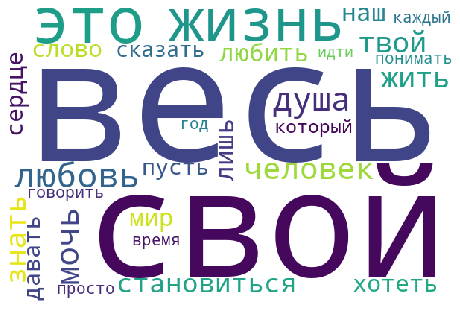

In [187]:
plt.figure(figsize=(8,12));
plt.imshow(wordcloud);
plt.axis('off');

In [188]:
backup_gensim_11_labeled_texts[backup_gensim_11_labeled_texts.topic_index==4]

,topic_index,topic_proba,topic_keywords,text
1,4,0.734,"весь, свой, это, жизнь, мочь, человек, знать, ...","\nВот улица есть и на ней есть прохожий,\nв од..."
3,4,0.396,"весь, свой, это, жизнь, мочь, человек, знать, ...",\n ***\nСтоят деревья без листвы...\nП...
5,4,0.818,"весь, свой, это, жизнь, мочь, человек, знать, ...",\nКарьере помогла родословная: «мы из бандитов...
10,4,0.554,"весь, свой, это, жизнь, мочь, человек, знать, ...","\nЯ стараюсь не унывать, унывать нельзя. \nЗах..."
15,4,0.786,"весь, свой, это, жизнь, мочь, человек, знать, ...","\nБогатство приходит к заблужденью быстро,\nИ ..."
...,...,...,...,...
22774,4,0.695,"весь, свой, это, жизнь, мочь, человек, знать, ...","\nСлово было не грубым, но веским,\nИ как пуля..."
22775,4,0.747,"весь, свой, это, жизнь, мочь, человек, знать, ...","\nСентябрь, дождик за окном,а мысли все твои о..."
22776,4,0.517,"весь, свой, это, жизнь, мочь, человек, знать, ...",\nСкоро Осень покинет нас.\nК нам Зима придёт...
22777,4,0.751,"весь, свой, это, жизнь, мочь, человек, знать, ...",\n18.10.19 “ Русский космизм – это ваши сани ...


In [189]:
print(get_topic_top_n_documents(gensim_7_topic_documents, 4, 10)[2])

topic #4, text #2, probability=0.9890

Да много в жизни есть сомнений
Не перечесть, не перебрать
И много у людей есть мнений
Но как от гибели спасать

Когда уже всё отключилось
Мой разум,чувства, дух ослаб
Я рад плохому, чтоб случилось
Ищу могилы, грешник, раб

Порою прихожу я в чувства
Влечёт нас Божья благодать
Но голос заглушает до безумства
Враг сатана, и хочет жизнь забрать

И двери в сердце видно поломались
Здесь многое мне в жизни не понять
Друзья ушли, плохие лишь остались
И кто готов, меня таким принять

Приди опять, я слышу голос, слова
Если ты в заботах, утруждён
Покой я дам, нет не сужу сурова
Я умер за тебя бывает пригвождён

Ищу меня, есть для тебя свобода
Я поддержу, очищу, научу
Я твой Господь в любое время года
Доверся мне и я не промолчу

Я знаю, как решать твои проблемы
Не затрудняй, мне их тебе решать
Дела твои, пороки, неизменный
Прими скорее сын мой, благодать



In [190]:
print(get_topic_top_n_documents(gensim_9_topic_documents, 4, 10)[1])

topic #4, text #1, probability=0.9870

Все ищут звезды. Я не вижу. 
Найду ее среди людей. 
Не ту, что далеко, а ближе, 
И сделаю навек своей. 

И будем счастьем мы светиться 
Особенно, когда вдвоем. 
К друг другу будем мы стремиться. 
И вечером и даже днем. 

Со мной, чтоб было интересно. 
Не потому, что так хочу, 
А, чтоб в душе твоей, как песня, 
Все откликалось, что молчу. 

Что говорю, чтоб было также 
К тебе близко, как ни к кому. 
И нас скрепляло, очень даже. 
В догадках, знаем, почему. 

Где не похожи, души тоже, 
Чтоб гармонировали нам. 
Друг другу, как своей же кожей, 
С единым сердцем пополам. 

И века, чтоб нам было мало. 
И были вместе навсегда. 
Поняв, что жизнь – это начало 
На счастье долгие года. 

Все ищут звезды. Я же вижу 
Тебя, с закрытыми глазами. 
И сердца стук вдали я слышу, 
То жизни ход, под небесами. 

Пусть только, как глаза откроем. 
То ощущенье не пройдет. 
Увидим нас и все построим, 
Чтоб вместе впредь идти вперед.



In [191]:
print(get_topic_top_n_documents(gensim_11_topic_documents, 4, 10)[0])

topic #4, text #0, probability=0.9860

Ты живешь, Время проходит мимо 
Ты бежишь, болеешь, или пьешь пиво. 
Ты теряешь, приобретаешь вновь. 
Ты стареешь, и знаешь про слово любовь. 

Ты не знаешь проблем, все дела ерунда! 
Может быть ты сказал, что это мечта. 
Может был ты в стране  и не видел чудес 
Я найду для тебя  эти пару колец. 

Ты прекрасное время, я теряю давно 
Крылья счастья и пепел мне засыпал все дно. 
Может быть ты когда -то улыбался в ответ 
А сейчас только слово, тебя больше нет... 

почему когда  в путь уходят поезда 
Я кричу им вслед мне ведь тоже к вам пора... 
Но ты живешь дальше,раскрою вам секрет 
У множества из нас выбора нет.... 

Почему все прошло , пропадают имена 
То что нас связало вместе не вернется  никогда. 
Почему я страдаю и хочу увидеть   вновь, 
Почему я знаю это слово, любовь?



In [192]:
print(get_topic_top_n_documents(mallet_9_topic_documents, 4, 10)[3])

topic #4, text #3, probability=0.9860

Смешно смотреть на мир сегодня 
Нет чести, верности, любви
Повсюду черти, будто в преисподней 
Предай, подставь - кричат они
И люди духом обнищали 
Скудны их мысли, лишь наебать 
Вы ум свой в барах раздавали 
Прекрасную сирену чтобы снять
Достоинства свои забыли парни
Их слово не имеет вес
Рисуют девочкам словами Нарнии 
Лишь только получить бы секс
Девчонки тоже далеко не убежали 
Им всё и сразу подавай теперь 
Улыбку в баре вы продали
За две текилы и коктейль 
И я не лучше вас всех вместе взятых 
И вряд-ли вы оцените стихи 
Быстрее в бар смышленые ребята 
Сиренам промывать мозги.



<div class='alert alert-block alert-warning'>Наиболее релевантные тексты этой темы можно охарактеризовать как содержащие <b>размышления о смысле жизни, душе и любви</b>. Ключевые слова согласуются с сожержанием текстов.</div>

<div class='alert alert-block alert-info'>Анализ текстов предполагаемой темы <b>"Природа, погода, времена года"</b></div>

In [193]:
topic_word_freq = {key:value for key, value in backup_text_mallet_model_9.show_topic(5, topn=40)}

In [194]:
wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(topic_word_freq)

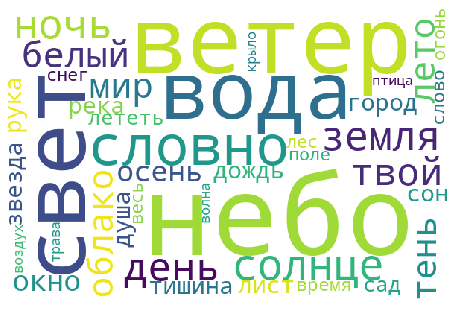

In [195]:
plt.figure(figsize=(8,12));
plt.imshow(wordcloud);
plt.axis('off');

In [196]:
topic_word_freq = {key:value for key, value in backup_text_mallet_model_9.show_topic(2, topn=40)}

In [197]:
wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(topic_word_freq)

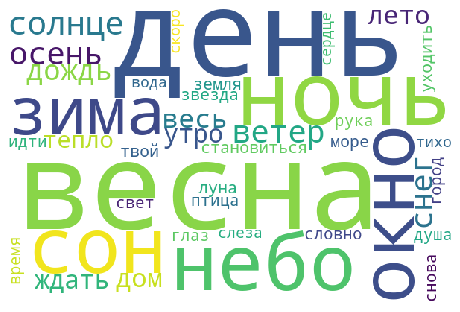

In [198]:
plt.figure(figsize=(8,12));
plt.imshow(wordcloud);
plt.axis('off');

In [199]:
backup_mallet_9_labeled_texts[(backup_mallet_9_labeled_texts.topic_index==5) | (backup_mallet_9_labeled_texts.topic_index==2)]

,topic_index,topic_proba,topic_keywords,text
2,2,0.519,"весна, день, ночь, небо, сон, окно, зима, солн...","\nМы раньше песни пели,\nНам было не до сна -\..."
3,2,0.681,"весна, день, ночь, небо, сон, окно, зима, солн...",\n ***\nСтоят деревья без листвы...\nП...
6,5,0.532,"небо, ветер, свет, вода, словно, солнце, ночь,...",\nПетр Великий поправил китель\nИ приветливо м...
9,5,0.576,"небо, ветер, свет, вода, словно, солнце, ночь,...","\nНа востоке звезда розовеет,\nСлишком робок с..."
10,2,0.705,"весна, день, ночь, небо, сон, окно, зима, солн...","\nЯ стараюсь не унывать, унывать нельзя. \nЗах..."
...,...,...,...,...
22766,5,0.516,"небо, ветер, свет, вода, словно, солнце, ночь,...","\nЧуть нависла дымка редких листьев,\nСплошь в..."
22773,2,0.674,"весна, день, ночь, небо, сон, окно, зима, солн...","\nСегодня так похолодало:\nТо дождь, то сн..."
22779,5,0.367,"небо, ветер, свет, вода, словно, солнце, ночь,...",\nрусский вариант текста песни Ghost of a Rose...
22780,5,0.353,"небо, ветер, свет, вода, словно, солнце, ночь,...",\nОгромный шар закатного светила\nОкрасил снег...


In [200]:
print(get_topic_top_n_documents(gensim_7_topic_documents, 5, 10)[1])

topic #5, text #1, probability=0.9880

Кленовый лист, ударившийся оземь,
Впадает в осень. Жизнь издалека,
О свете белом весточки доносит,
В конверты загоняя облака.

Я — лист, звездою павший среди сосен,
Лежу и представляю, как идут
Кленовые рога седому лосю,
Застывшему в полуденном меду,

Как мышь - летунья крылышком кленовым
Вытряхивает муть из облаков,
Как вихрем конь летит на зло подковам,
Роняя в осень яблоки с боков,

Как бережно плетут лесные духи
Друг другу в дар кленовые венки,
Чтоб почки распускались, словно слухи
Весною ранней, наперегонки,

Как в пепельных глазах сияет просинь,
Гуляет ветер, плещется река…
Он - честный клен, меня который сбросил,
На безответность чтоб не обрекать.



In [201]:
print(get_topic_top_n_documents(gensim_9_topic_documents, 2, 10)[1])

topic #2, text #1, probability=0.9720

Июньским утром, рано, мир – нирвана!
Лишь затаи дыхание, замри –
и отразятся в капельках тумана
все родники – все родинки – Земли...

...День на меду настоян; загустевший
гул насекомых – певчих мух; возня
злых гусениц; ком тли заплесневевшей.
И мух, и тлю, и гусениц казня,

снуют по им одним знакомым тропам,
с мужицкою смекалкой – муравьи,
рассматривая через мелкоскопы
окаменевших куколок айвы.

Там сном объяты белые личинки.
Но чудится мне: вылупившись в срок,
они вспорхнут, как чёрные снежинки
сожжённых мной, закуклившихся строк.



In [202]:
print(get_topic_top_n_documents(gensim_7_topic_documents, 5, 10)[4])

topic #5, text #4, probability=0.9850

1

На небе лишь волн не хватает, чтоб в них
Качала луна желтизну расписную,
И звёзды сияли всю ночь, точно миг,
Мерцая, как камни, сквозь толщу речную.

И ветви сплотились в огромную клеть,
Прохладу на гулкий простор проливая,
И птица сидит, чтоб сейчас улететь,
Как лодка по чёрной воде проплывая.

2

В такие часы и в такой тишине
Ясней приоткроется за тишиною,
Что только покой отпускается мне
Благою и слишком бессонной луною.

И листья трепещут, с собою неся
Лишь то, что пожухнет, умолкнет и сгинет,
И ждёшь, что откроется дверь в небеса,
И птица незримые крылья раскинет.

1996.



In [203]:
print(get_topic_top_n_documents(gensim_9_topic_documents, 2, 10)[2])

topic #2, text #2, probability=0.9700

Здесь обрушился скальный карниз,
и с дороги, теперь непроезжей,
я спускаюсь с опаскою вниз,
где, укутавшись в мех белоснежный,
берег узкий навис над Курой
и заслушался песней гортанной.
Спой и мне, я послушаю, спой…
Ты ведь песни поешь непрестанно,
я запомнил немало из них,
вот и новая просится в душу,
и меня как-нибудь помяни –
как стоял над тобою и слушал… 



In [204]:
print(get_topic_top_n_documents(gensim_11_topic_documents, 5, 10)[0])

topic #5, text #0, probability=0.9870

* * *


Приходится нечто из зимнего воздуха брать,
выхватывать искру из беглого встречного взора,
чтоб снова сумели слова кавалькадой скакать, 
серебряной дробью звенеть по камням разговора.
Строка оживает, когда поспевает пора –
предельное время, пока еще внешне земное –
когда интонаций и звуков, и ритмов игра
минует излом и взмывает воздушной волною.

Когда Леонардо и заполночь краски кладет
на тополь и грушу, то левую руку Да Винчи
тосканское небо по звездным зарубкам ведет
и винт астролябии в полную меру отвинчен.
Тоскана лазурная, вьюги славянской зима… -
Какие живые, друг друга влекущие, краски!
Когда–небудь вновь флорентийских кремлей терема
багряную кожу на снег отряхнут без опаски.



In [205]:
print(get_topic_top_n_documents(sklearn_4_topic_documents, 3, 10)[4])

topic #3, text #4, probability=0.9720

За облаком облако -
небу неймётся -
не спится ему,
всё грезится:

на тёплой ладони
осеннего солнца
синица
сидит и греется...

И хочется небу
в свои небеса,
туда,
где оно синится...

Но каждый себя
выбирает сам,
пора и на землю
спуститься...

И небо покроется
серым пером,
нахохлится -
тоже мне, клуша...

покуда весенний
ликующий гром
его не потащит
по лужам
 
туда, где, хмелея,
овраг-водохлёб
поёт, заливаясь,
курлычет!..

и небо тогда
облегченно вздохнёт
и солнце
по-птичьи покличет.



<div class='alert alert-block alert-warning'>Наиболее релевантные тексты этой темы можно охарактеризовать как содержащие <b>описания пейзажей, состояний природы, погодных явлений</b>. Ключевые слова согласуются с сожержанием текстов.</div>

<div class='alert alert-block alert-info'>Анализ текстов предполагаемой темы <b>"О детях, для детей"</b></div>

In [206]:
topic_word_freq = {key:value for key, value in backup_text_gensim_model_7.show_topic(3, topn=40)}

In [207]:
wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(topic_word_freq)

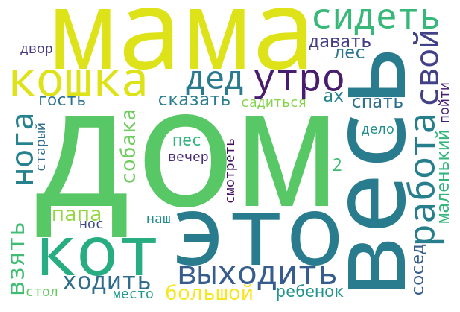

In [208]:
plt.figure(figsize=(8,12));
plt.imshow(wordcloud);
plt.axis('off');

In [209]:
backup_gensim_7_labeled_texts[backup_gensim_7_labeled_texts.topic_index==3]

,topic_index,topic_proba,topic_keywords,text
7,3,0.271,"дом, мама, весь, это, кот, кошка, утро, работа...",\nжестом кошачьим надежды слижет\nзлая больная...
52,3,0.529,"дом, мама, весь, это, кот, кошка, утро, работа...","\n1. Зажигает причал Одесса мама,\nИ гуляют па..."
66,3,0.669,"дом, мама, весь, это, кот, кошка, утро, работа...","\nНадевай же милая платице нарядное,\nНас с то..."
84,3,0.547,"дом, мама, весь, это, кот, кошка, утро, работа...","\nВетер – кошка, город – мышка,\nТак сказать, ..."
94,3,0.538,"дом, мама, весь, это, кот, кошка, утро, работа...",\n Наша мама обожает залезать со м...
...,...,...,...,...
22749,3,0.498,"дом, мама, весь, это, кот, кошка, утро, работа...",\nЯ пью цикорий и мне это нравится. \nКофе по ...
22753,3,0.857,"дом, мама, весь, это, кот, кошка, утро, работа...",\nНе давай унынию ни одного шанса господствова...
22756,3,0.588,"дом, мама, весь, это, кот, кошка, утро, работа...","\nПлещется вода, бьётся о наш берег,\nВолны по..."
22757,3,0.817,"дом, мама, весь, это, кот, кошка, утро, работа...","\nМы, люди, в разных с ним ролях:\n- Лосось со..."


In [210]:
print(get_topic_top_n_documents(gensim_7_topic_documents, 3, 10)[3])

topic #3, text #3, probability=0.9460

У избушки – курьи ножки,
А на ножках – босоножки,
Две косы – под самой крышей,
И у двери – леший рыжий.

Он избу на курьих ножках
Пригласить пришел в киношку!



In [211]:
print(get_topic_top_n_documents(gensim_11_topic_documents, 10, 10)[1])

topic #10, text #1, probability=0.9550

Как играл на гармони медведь,
В полосатых штанах и лаптях.
Он сидел на завалинке ведь,
Жал на клавиши лапой в когтях.

И гармонь отвечала ему;
Прижималась к груди, и, смеясь,
Всё тянулась, куда не пойму...
А потом – и совсем порвалась.



In [212]:
print(get_topic_top_n_documents(mallet_9_topic_documents, 3, 10)[0])

topic #3, text #0, probability=0.9630

Сегодня дедушка со мной,
Он у меня большой Герой.
Я трогаю медали
И ордена рукой –
Вон ту под Курском дали,
А орден – под Москвой.

За бой один рисковый
Отмечен дед под Псковом.
Читаю горделиво:
- За взятие Берлина!..

Сегодня День Победы –
Я деда обниму,
Послушаю беседы
Про страшную войну.



In [213]:
print(get_topic_top_n_documents(mallet_11_topic_documents, 10, 10)[2])

topic #10, text #2, probability=0.8620

Сидела на ромашечке
Букатая жукашечка
И средней парой ножечек
Держала хлеб и ножичек.

С чайком дымятся чашечки –
Спешат друзья к жукашечке.
Жужжание-гудение –
Спешат на День рождения:

Бабусеничка-душечка,
Гусябочка,
Жабушечка,
Стрекочики усатые
И шмёлы полосатые…

Нарядная жукашечка –
Красивые кудряшечки,
Сережечки-петелечки…
Ведь ей уж пол-не-де-леч-ки!



<div class='alert alert-block alert-warning'>Наиболее релевантные тексты этой темы можно охарактеризовать как <b>стихотворения для детей, воспоминания о детстве</b>. Ключевые слова согласуются с сожержанием текстов.</div>

<div class='alert alert-block alert-info'><b>Тексты на других языках</b></div>

In [214]:
print(get_topic_top_n_documents(gensim_7_topic_documents, 6, 10)[3])

topic #6, text #3, probability=0.9920

She said she never wanted to be played.
But I realized she was the one who was playing
With me, but it was already too late.
I fell deeply in love.
Seeing her once in a while was not enough.
I was becoming crazy and mad.
I was calling her cell phone
but sounded like a stupid moron.
I was so sad.
A white guy and a black girl.
One drowned in love, the other`s heart`s stone cold.
I thought this match was made in heaven
But the number of gates is still seven.
Is this my fate to go through them all
And then fall underneath too weak
To be able to breathe left in the dark all alone?
I felt like a fly in a spider`s web.
I felt as if I fell into her sticky trap.
But I could not get away from a particular feeling
That her beauty is so deceiving under her dark skin.
Why would a normal girl be so cruel and mean?



In [215]:
print(get_topic_top_n_documents(mallet_9_topic_documents, 7, 10)[6])

topic #7, text #6, probability=0.9870

*
I write my poems every day.
But I am not a fool like other
to show in poems real way.
For real things I do not bother.

No love, no senses and no joy
you’ll find in lines which my pen’s writing.
For me these poems are a toy,
that like a child me is inviting

to pass an hour in their dreams.
To see reality unreal.
When I write them, for me it seems
I'm calmly lying under veil,

which does defend myself from woes.
And I can’t stop that strangest dealing.
Someday you bring to me a rose.
This flower all the souls is healing...
*



In [216]:
print(get_topic_top_n_documents(mallet_11_topic_documents, 7, 10)[3])

topic #7, text #3, probability=0.9850

You are engaged, I'm married. 
It is very strange, but no one has died, 
you have the  love first,
and I have the last. 
You will open your pages, 
I will soon close the book strange. 
You look into bright future, 
I will be sad before distant departure
Don’t worry about me, 
just one sad song will be more. 
“I built a bridge, 
I stood on it, 
I slept under, 
I wanted to fly, 
but my wings didn’t grow. 
this song is slow 
as my rivers flow”



<div class='alert alert-block alert-info'><p> </p><p> </p></div>

<div class='alert  alert-block alert-warning'>
    <p>УДАЛОСЬ ВЫДЕЛИТЬ <b>4</b> НАИБОЛЕЕ КРУПНЫХ ТЕМЫ, ОБЩИЕ ДЛЯ ВСЕХ МОДЕЛЕЙ, ВЗЯТЫХ ДЛЯ ВИЗУЛИЗАЦИИ И ПОДРОБНОГО АНАЛИЗИ.</p>
</div>

## 6. Классификация текстов по выделенным темам

<div class='alert block-alert alert-info'>
    <p>Присвоим темам текстовые индексы вместо численных.</p>
    <p>Текстовых индексов будет 5: 1) <b>sense_of_life</b>, 2) <b>nature_weather</b>, 3) <b>childhood</b>, 4) <b>foreign_language</b>, 5) <b>undefined</b>.</p>
    <p>К <b>undefined</b> отнесём тексты, тех тем, ключевые слова которых не имеют общей идеи или смысла.</p>
    <p>Соберём текстовые индексы, присвоенные всеми моделями в общую таблицу.</p>
</div>

In [217]:
text_labels_summary = working_data.drop(columns=['title', 'text'])
text_labels_summary['title'] = raw_data['title']
text_labels_summary['text'] = raw_data['text']

In [218]:
text_labels_summary

,author_name,date,title_len,text_len,title,text
0,Нина Злаказова,2016-11-30,1,59,годовщина,"\nКак тридцать три стукнет,\nкорыто отдам закл..."
1,Геворк,2016-11-30,1,35,Улица,"\nВот улица есть и на ней есть прохожий,\nв од..."
2,Ольга Костякова,2016-11-21,3,85,Мы раньше песни пели,"\nМы раньше песни пели,\nНам было не до сна -\..."
3,Сергей Бандуровский,2016-11-17,3,34,Стоят деревья без листвы,\n ***\nСтоят деревья без листвы...\nП...
4,Полина Ерофеева,2016-11-17,3,89,призрак Ширли Мэнсон,\nШирли Мэнсон в красном халате \nШастает по б...
...,...,...,...,...,...,...
22777,Сергей Артюх,2019-11-01,8,629,18. 10. 19 Русский космизм это ваши сани,\n18.10.19 “ Русский космизм – это ваши сани ...
22778,Дарья Татарчук,2019-11-01,3,44,Нашим бабушкам и дедушкам,"\nИм нужно чуть больше внимания, \nИ несколько..."
22779,Катерина Ия Баранова,2019-11-01,2,86,Призрак розы,\nрусский вариант текста песни Ghost of a Rose...
22780,Александр Анайкин,2019-11-01,4,49,Огромный шар закатного светила,\nОгромный шар закатного светила\nОкрасил снег...


<div class='alert alert-block alert-info'><b>Словари</b> соответствия индексов тем и их текстового обозначения</div>

In [219]:
sl = 'sense_of_life'
nw = 'nature_weather'
ch = 'childhood'
fl = 'foreign_language'
ud = 'undefined'

In [220]:
g_7_topic_dictionary = {0:ud, 1:ud, 2:nw, 3:ch, 4:sl, 5:nw, 6:fl} # соответствие индексов тем и их значения для модели gensim_model_7
g_9_topic_dictionary = {0:ud, 1:ud, 2:nw, 3:ud, 4:sl, 5:nw, 6:ud, 7:fl, 8:ud} # соответствие индексов тем и их значения для модели gensim_model_9
g_11_topic_dictionary = {0:ud, 1:ud, 2:ud, 3:ud, 4:sl, 5:nw, 6:ud, 7:fl, 8:ud, 9:ud, 10:ch} # соответствие индексов тем и их значения для модели gensim_model_11

m_7_topic_dictionary = {0:ud, 1:ud, 2:nw, 3:ch, 4:sl, 5:nw, 6:fl} # соответствие индексов тем и их значения для модели mallet_model_7
m_9_topic_dictionary = {0:ud, 1:ud, 2:nw, 3:ch, 4:sl, 5:nw, 6:ud, 7:fl, 8:ud} # соответствие индексов тем и их значения для модели mallet_model_9
m_11_topic_dictionary = {0:ud, 1:ud, 2:ud, 3:ud, 4:sl, 5:nw, 6:ud, 7:fl, 8:ud, 9:ud, 10:ch} # соответствие индексов тем и их значения для модели mallet_model_11

In [221]:
text_labels_summary['g7_topic'] = backup_gensim_7_labeled_texts['topic_index'].apply(lambda idx: g_7_topic_dictionary[idx])
text_labels_summary['g7_score'] = backup_gensim_7_labeled_texts['topic_proba']

text_labels_summary['g9_topic'] = backup_gensim_9_labeled_texts['topic_index'].apply(lambda idx: g_9_topic_dictionary[idx])
text_labels_summary['g9_score'] = backup_gensim_9_labeled_texts['topic_proba']

text_labels_summary['g11_topic'] = backup_gensim_11_labeled_texts['topic_index'].apply(lambda idx: g_11_topic_dictionary[idx])
text_labels_summary['g11_score'] = backup_gensim_11_labeled_texts['topic_proba']

text_labels_summary['m7_topic'] = backup_mallet_7_labeled_texts['topic_index'].apply(lambda idx: m_7_topic_dictionary[idx])
text_labels_summary['m7_score'] = backup_mallet_7_labeled_texts['topic_proba']

text_labels_summary['m9_topic'] = backup_mallet_9_labeled_texts['topic_index'].apply(lambda idx: m_9_topic_dictionary[idx])
text_labels_summary['m9_score'] = backup_mallet_9_labeled_texts['topic_proba']

text_labels_summary['m11_topic'] = backup_mallet_11_labeled_texts['topic_index'].apply(lambda idx: m_11_topic_dictionary[idx])
text_labels_summary['m11_score'] = backup_mallet_11_labeled_texts['topic_proba']

<div class='alert alert-block alert-info'>Сводная таблица меток и "уверенностей" моделей</div>

In [222]:
text_labels_summary

,author_name,date,title_len,text_len,title,text,g7_topic,g7_score,g9_topic,g9_score,g11_topic,g11_score,m7_topic,m7_score,m9_topic,m9_score,m11_topic,m11_score
0,Нина Злаказова,2016-11-30,1,59,годовщина,"\nКак тридцать три стукнет,\nкорыто отдам закл...",nature_weather,0.669,nature_weather,0.265,nature_weather,0.434,nature_weather,0.719,undefined,0.426,nature_weather,0.415
1,Геворк,2016-11-30,1,35,Улица,"\nВот улица есть и на ней есть прохожий,\nв од...",sense_of_life,0.727,sense_of_life,0.711,sense_of_life,0.734,sense_of_life,0.759,sense_of_life,0.588,sense_of_life,0.942
2,Ольга Костякова,2016-11-21,3,85,Мы раньше песни пели,"\nМы раньше песни пели,\nНам было не до сна -\...",nature_weather,0.639,nature_weather,0.342,foreign_language,0.267,nature_weather,0.705,nature_weather,0.519,sense_of_life,0.309
3,Сергей Бандуровский,2016-11-17,3,34,Стоят деревья без листвы,\n ***\nСтоят деревья без листвы...\nП...,nature_weather,0.648,sense_of_life,0.483,sense_of_life,0.396,nature_weather,0.648,nature_weather,0.681,undefined,0.421
4,Полина Ерофеева,2016-11-17,3,89,призрак Ширли Мэнсон,\nШирли Мэнсон в красном халате \nШастает по б...,sense_of_life,0.341,nature_weather,0.312,undefined,0.480,sense_of_life,0.275,sense_of_life,0.203,undefined,0.398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22777,Сергей Артюх,2019-11-01,8,629,18. 10. 19 Русский космизм это ваши сани,\n18.10.19 “ Русский космизм – это ваши сани ...,sense_of_life,0.884,sense_of_life,0.679,sense_of_life,0.751,sense_of_life,0.906,sense_of_life,0.847,sense_of_life,0.753
22778,Дарья Татарчук,2019-11-01,3,44,Нашим бабушкам и дедушкам,"\nИм нужно чуть больше внимания, \nИ несколько...",sense_of_life,0.826,sense_of_life,0.907,sense_of_life,0.898,sense_of_life,0.841,sense_of_life,0.906,sense_of_life,0.799
22779,Катерина Ия Баранова,2019-11-01,2,86,Призрак розы,\nрусский вариант текста песни Ghost of a Rose...,nature_weather,0.871,nature_weather,0.361,nature_weather,0.550,nature_weather,0.883,nature_weather,0.367,nature_weather,0.519
22780,Александр Анайкин,2019-11-01,4,49,Огромный шар закатного светила,\nОгромный шар закатного светила\nОкрасил снег...,nature_weather,0.524,nature_weather,0.638,nature_weather,0.518,nature_weather,0.648,nature_weather,0.353,nature_weather,0.615


<div class='alert alert-block alert-info'><p>Для каждой категории меток оставим только максимальные по всем моделям значения "уверенности"</p><p>Максимизируем оценки по моделям</p></div>

In [223]:
text_label_max_scores = {'sense_of_life':[], 'nature_weather':[], 'childhood':[], 'foreign_language':[], 'undefined':[]}
for item in text_labels_summary[['g7_topic', 'g7_score', 'g9_topic', 'g9_score', 'g11_topic', 'g11_score', 'm7_topic', 'm7_score', 'm9_topic', 'm9_score', 'm11_topic', 'm11_score']].values:
    item_topic_scores = {'sense_of_life':[0], 'nature_weather':[0], 'childhood':[0], 'foreign_language':[0], 'undefined':[0]}
    for idx in range(0, 12, 2):
        topic_key = item[idx]
        proba_value = item[idx+1]
        item_topic_scores[topic_key].append(proba_value)
    item_max_scores = {'sense_of_life':0, 'nature_weather':0, 'childhood':0, 'foreign_language':0, 'undefined':0}
    for key in item_topic_scores.keys():
        item_max_scores[key] = np.max(item_topic_scores[key])
    for key in item_max_scores.keys():
        text_label_max_scores[key].append(item_max_scores[key])

In [224]:
text_category_scores = text_labels_summary.drop(columns=['g7_topic', 'g7_score', 'g9_topic', 'g9_score', 'g11_topic', 'g11_score', 'm7_topic', 'm7_score', 'm9_topic', 'm9_score', 'm11_topic', 'm11_score'])
text_category_scores = pd.concat([text_category_scores, pd.DataFrame.from_dict(text_label_max_scores)], axis=1)

<div class='alert alert-block alert-info'><b>Сводная таблица максимальных "уверенностей" моделей в каждой из тем (катеогрий)</b></div>

In [225]:
text_category_scores

,author_name,date,title_len,text_len,title,text,sense_of_life,nature_weather,childhood,foreign_language,undefined
0,Нина Злаказова,2016-11-30,1,59,годовщина,"\nКак тридцать три стукнет,\nкорыто отдам закл...",0.000,0.719,0.0,0.000,0.426
1,Геворк,2016-11-30,1,35,Улица,"\nВот улица есть и на ней есть прохожий,\nв од...",0.942,0.000,0.0,0.000,0.000
2,Ольга Костякова,2016-11-21,3,85,Мы раньше песни пели,"\nМы раньше песни пели,\nНам было не до сна -\...",0.309,0.705,0.0,0.267,0.000
3,Сергей Бандуровский,2016-11-17,3,34,Стоят деревья без листвы,\n ***\nСтоят деревья без листвы...\nП...,0.483,0.681,0.0,0.000,0.421
4,Полина Ерофеева,2016-11-17,3,89,призрак Ширли Мэнсон,\nШирли Мэнсон в красном халате \nШастает по б...,0.341,0.312,0.0,0.000,0.480
...,...,...,...,...,...,...,...,...,...,...,...
22777,Сергей Артюх,2019-11-01,8,629,18. 10. 19 Русский космизм это ваши сани,\n18.10.19 “ Русский космизм – это ваши сани ...,0.906,0.000,0.0,0.000,0.000
22778,Дарья Татарчук,2019-11-01,3,44,Нашим бабушкам и дедушкам,"\nИм нужно чуть больше внимания, \nИ несколько...",0.907,0.000,0.0,0.000,0.000
22779,Катерина Ия Баранова,2019-11-01,2,86,Призрак розы,\nрусский вариант текста песни Ghost of a Rose...,0.000,0.883,0.0,0.000,0.000
22780,Александр Анайкин,2019-11-01,4,49,Огромный шар закатного светила,\nОгромный шар закатного светила\nОкрасил снег...,0.000,0.648,0.0,0.000,0.000


<div class='alert alert-block alert-info'>Максимииуруем оценки по категоряим, т.е. для каждого тектса выберем наиболее вероятную тему</div>

In [226]:
text_category_scores['top_category'] = text_category_scores.loc[:,['sense_of_life','nature_weather','childhood','foreign_language','undefined']].idxmax(axis=1)
text_category_scores['top_score'] = text_category_scores.loc[:,['sense_of_life','nature_weather','childhood','foreign_language','undefined']].max(axis=1)

In [227]:
text_category_scores.sort_values(by=['date', 'author_name', 'title'], inplace=True)
text_category_scores

,author_name,date,title_len,text_len,title,text,sense_of_life,nature_weather,childhood,foreign_language,undefined,top_category,top_score
151,Аглая Паюшина,2016-11-01,3,57,день пахнет яблоком...,\nдень пахнет яблоком... наверно гонит сидр \n...,0.000,0.480,0.000,0.392,0.295,nature_weather,0.480
148,Василий Тюренков,2016-11-01,3,86,На притихшие парки ложась,"\nОсень, шорохом листьев ложась\nНа остывшее л...",0.000,0.968,0.000,0.000,0.000,nature_weather,0.968
150,Евгений Филин-Соколов,2016-11-01,2,93,Осенний бриз,"\nОблетают листья, обнажая высь.\nНа бульваре ...",0.000,0.866,0.000,0.000,0.000,nature_weather,0.866
146,Надежда Бесфамильная,2016-11-01,4,103,Вымыть окна по первому снегу,\nК дому верным немым оберегом\nНаклонился сир...,0.000,0.550,0.000,0.000,0.000,nature_weather,0.550
144,Нора Никанорова,2016-11-01,1,66,jamais,"\nНичего не изменилось с той поры,\nКак тебя з...",0.000,0.371,0.000,0.000,0.338,nature_weather,0.371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22762,Порошина Вера,2019-11-04,2,58,Ночной звонок,"\nНОЧНОЙ ЗВОНОК\nПроснулась,\nболью прошита ре...",0.417,0.570,0.000,0.000,0.000,nature_weather,0.570
22760,Уктам Алимов452,2019-11-04,0,11,***,\nПьяная женщина - дверь без замка\nС катушек ...,0.562,0.922,0.000,0.000,0.000,nature_weather,0.922
22761,Влад Норманн,2019-11-05,2,58,Мой страшный сон,"\nСтрашные мелькают \nзаголовки, \nночь на сер...",0.304,0.450,0.313,0.000,0.000,nature_weather,0.450
22765,Рудольф Голощапов,2019-11-05,2,29,"Старое, как новое!","\nПришло старое, как новое без вины!\nХоть дав...",0.931,0.000,0.000,0.000,0.000,sense_of_life,0.931


In [228]:
#text_category_scores.to_pickle('./data/stihiru_selected_dump_classified.pkl')

In [229]:
text_category_scores['top_category'].value_counts()

sense_of_life       12114
nature_weather       9564
childhood             604
undefined             343
foreign_language      157
Name: top_category, dtype: int64

In [230]:
sense_df = text_category_scores.loc[text_category_scores['top_category']=='sense_of_life']
nature_df = text_category_scores.loc[text_category_scores['top_category']=='nature_weather']
child_df = text_category_scores.loc[text_category_scores['top_category']=='childhood']
foreign_df = text_category_scores.loc[text_category_scores['top_category']=='foreign_language']
undefined_df = text_category_scores.loc[text_category_scores['top_category']=='undefined']

## 7. Анализ размеченных текстов

<div class='alert alert-block alert-info'>
    <p>Теперь, имея размеченные набор текстов, можно провести анализ распределений по катеогриям (темам).</p>
    <p><b>ЕСЛИ РАССМАТРИВАТЬ ТЕКСТЫ СТИХОВ КАК СВОЕОБРАЗНОЕ ВЫРАЖЕНИЕ ОБЩЕСТВЕННОГО МНЕНИЯ, ТАКОЙ АНАЛИЗ МОЖЕТ ПРЕДСТАВЛЯТЬ ИНТЕРЕС ДЛЯ СОЦОЛОГИЧЕСКИХ ИССЛЕДОВАНИЙ.</b></p>
</div>

<div class='alert alert-block alert-info'>    
    <p>Для примера проанализируем, как распределено количество публикаций разных категорий по году в недельных интервалах.</p>
    <p>Такое распределение былор бы интересно сопоставить с датами <b>праздников, важных политических, культурных, спортивных событий, громких преступлений</b>.</p>
</div>

In [231]:
def get_weekly_counts(df, name_prefix=None):
    count_df = df['date'].groupby(by=[text_category_scores['date'].dt.year.rename('year'), text_category_scores['date'].dt.week.rename('week')]).agg({'count'})
    count_df.reset_index(inplace=True)
    count_df['year'] = count_df['year'].apply(lambda x: x%100)
    count_df['year_week'] = count_df[['year', 'week']].apply(lambda x: f'{x[0]:02d}_{x[1]:02d}', axis=1)
    count_df = count_df.drop(['year', 'week'], axis=1)
    count_df.set_index('year_week', inplace=True)
    if name_prefix is None:
        count_df.columns = ['weekly_count']
    else:
        count_df.columns = [f'{name_prefix}_weekly_count']
    return count_df

In [232]:
sense_weekly_counts = get_weekly_counts(sense_df, 'sense')
nature_weekly_counts = get_weekly_counts(nature_df, 'nature')
child_weekly_counts = get_weekly_counts(child_df, 'child')
foreign_weekly_counts = get_weekly_counts(foreign_df, 'foreign')
undefined_weekly_counts = get_weekly_counts(undefined_df, 'undefined')

summary_weekly_counts = pd.concat([sense_weekly_counts, nature_weekly_counts, child_weekly_counts, foreign_weekly_counts, undefined_weekly_counts], axis=1, sort=True).fillna(0)

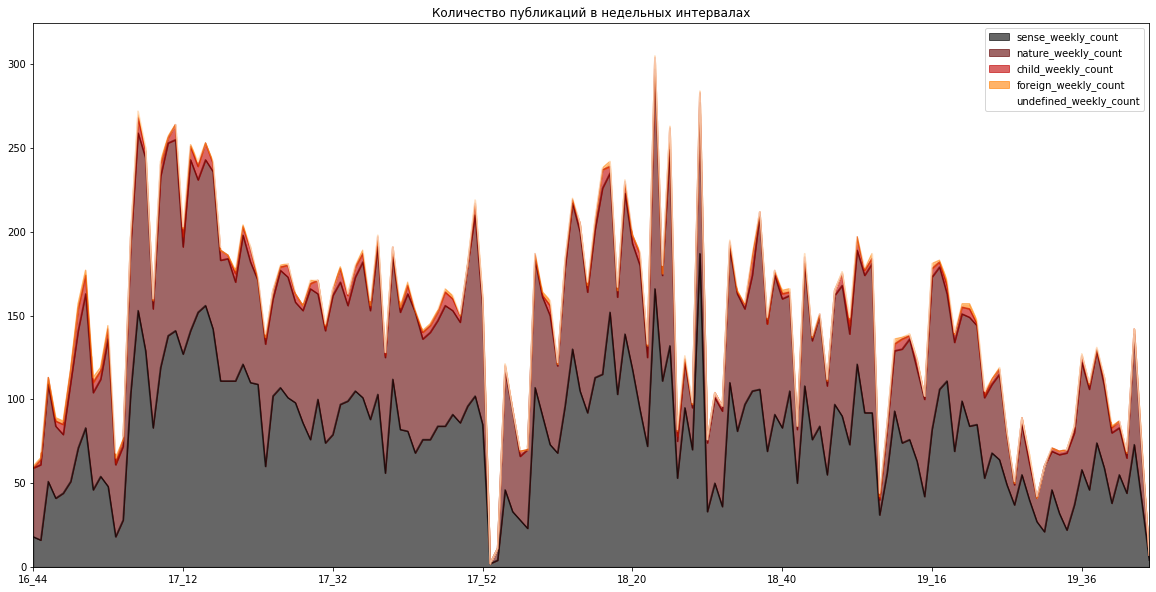

In [233]:
summary_weekly_counts.plot(figsize=(20,10), kind='area', colormap='gist_heat', alpha=0.6, title='Количество публикаций в недельных интервалах');

In [234]:
def get_monthly_counts(df, name_prefix=None):
    count_df = df['date'].groupby(by=[text_category_scores['date'].dt.year.rename('year'), text_category_scores['date'].dt.month.rename('month')]).agg({'count'})
    count_df.reset_index(inplace=True)
    count_df['year'] = count_df['year'].apply(lambda x: x%100)
    count_df['year_month'] = count_df[['year', 'month']].apply(lambda x: f'{x[0]:02d}_{x[1]:02d}', axis=1)
    count_df = count_df.drop(['year', 'month'], axis=1)
    count_df.set_index('year_month', inplace=True)
    if name_prefix is None:
        count_df.columns = ['monthly_count']
    else:
        count_df.columns = [f'{name_prefix}_monthly_count']
    return count_df

In [236]:
sense_monthly_counts = get_monthly_counts(sense_df, 'sense')
nature_monthly_counts = get_monthly_counts(nature_df, 'nature')
child_monthly_counts = get_monthly_counts(child_df, 'child')
foreign_monthly_counts = get_monthly_counts(foreign_df, 'foreign')
undefined_monthly_counts = get_monthly_counts(undefined_df, 'undefined')

summary_monthly_counts = pd.concat([sense_monthly_counts, nature_monthly_counts, child_monthly_counts, foreign_monthly_counts, undefined_monthly_counts], axis=1, sort=True).fillna(0)

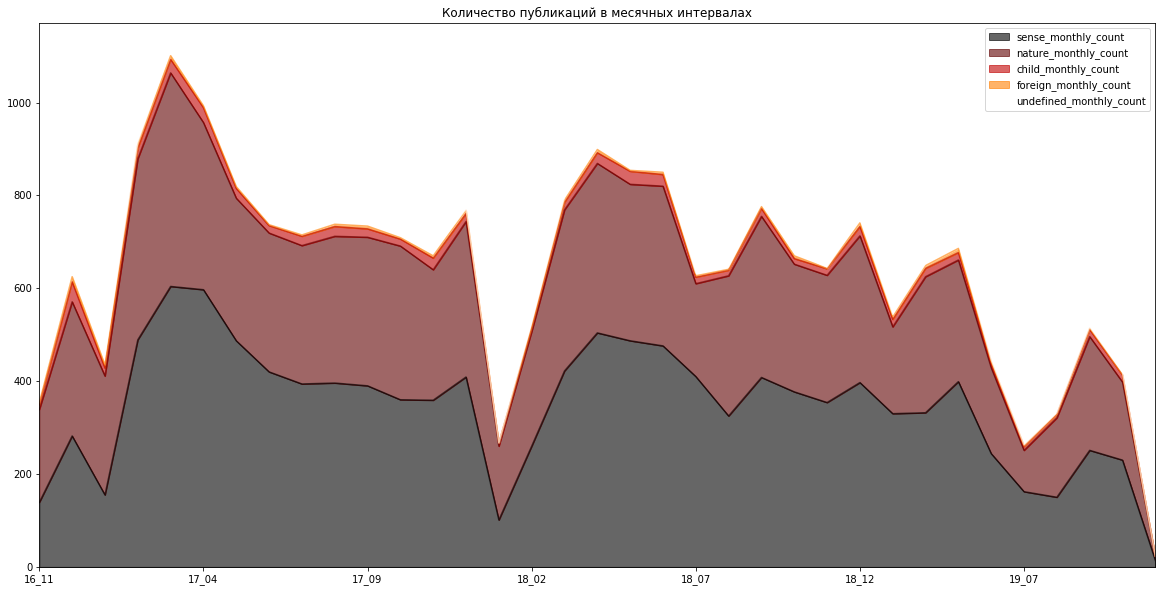

In [237]:
summary_monthly_counts.plot(figsize=(20,10), kind='area', colormap='gist_heat', alpha=0.6, title='Количество публикаций в месячных интервалах');

<div class='alert alert-block alert-warning'>
    <p><b>ПО КОЛИЧЕСТВАМ ПУБЛИКАЦИЙ В НЕДЕЛЬНЫЕ И МЕСЯЧНЫЕ ИНТЕРВАЛЫ ПРОСЛЕЖИВАЮТСЯ:</b></p>
    <p>- ПРОВАЛЫ В НАЧАЛЕ ГОДА И В ЛЕТНИЕ МЕСЯЦЫ - ПЕРИОД ОТПУСКОВ</p>
    <p>- ПИКИ В КОНЦЕ ГОДА - ПЕРЕД НОВОГОДНИМИ КАНИКУЛАМИ</p>
    <p>- ПАДЕНИЕ ДОЛИ ПУБЛИКАЦИЙ О ПРИРОДЕ И ПОГОДЕ В ВЕСЕННИЕ МЕСЯЦЫ</p>
</div>

<div class='alert alert-block alert-info'>    
    <p>Также интересно распределение количества публикаций по <b>дням года</b>, <b>дням месяца</b>, <b>месяцам</b>, <b>дням недели</b>.</p>
</div>

In [238]:
def get_by_yearday_counts(df, name_prefix=None):
    count_df = df['date'].groupby(by=[text_category_scores['date'].dt.dayofyear.rename('dayofyear')]).agg({'count'})
    count_df.reset_index(inplace=True)        
    count_df.set_index('dayofyear', inplace=True)
    if name_prefix is None:
        count_df.columns = ['yearday_count']
    else:
        count_df.columns = [f'{name_prefix}_yearday_count']    
    return count_df

In [240]:
sense_by_yearday_counts = get_by_yearday_counts(sense_df, 'sense')
nature_by_yearday_counts = get_by_yearday_counts(nature_df, 'nature')
child_by_yearday_counts = get_by_yearday_counts(child_df, 'child')
foreign_by_yearday_counts = get_by_yearday_counts(foreign_df, 'foreign')
undefined_by_yearday_counts = get_by_yearday_counts(undefined_df, 'undefined')

summary_by_yearday_counts = pd.concat([sense_by_yearday_counts, nature_by_yearday_counts, child_by_yearday_counts, foreign_by_yearday_counts, undefined_by_yearday_counts], axis=1, sort=True).fillna(0)

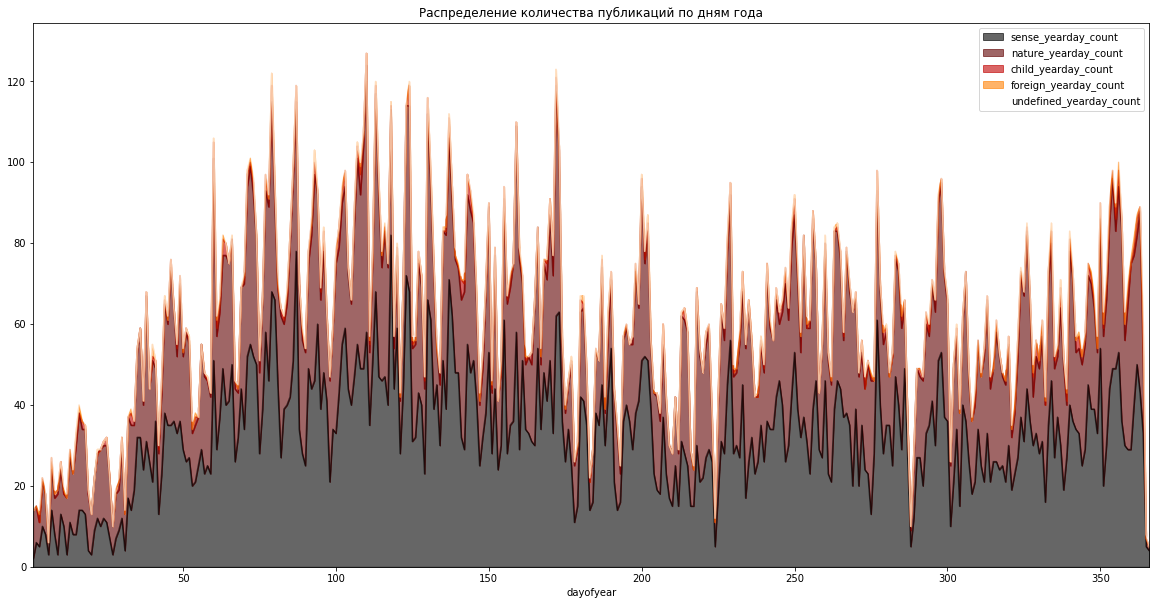

In [241]:
summary_by_yearday_counts.plot(figsize=(20,10), kind='area', colormap='gist_heat', alpha=0.6, title='Распределение количества публикаций по дням года');

In [242]:
def get_by_monthday_counts(df, name_prefix=None):
    count_df = df['date'].groupby(by=[text_category_scores['date'].dt.day.rename('day')]).agg({'count'})
    count_df.reset_index(inplace=True)        
    count_df.set_index('day', inplace=True)
    if name_prefix is None:
        count_df.columns = ['day_count']
    else:
        count_df.columns = [f'{name_prefix}_day_count']    
    return count_df

In [243]:
sense_by_monthday_counts = get_by_monthday_counts(sense_df, 'sense')
nature_by_monthday_counts = get_by_monthday_counts(nature_df, 'nature')
child_by_monthday_counts = get_by_monthday_counts(child_df, 'child')
foreign_by_monthday_counts = get_by_monthday_counts(foreign_df, 'foreign')
undefined_by_monthday_counts = get_by_monthday_counts(undefined_df, 'undefined')

summary_by_monthday_counts = pd.concat([sense_by_monthday_counts, nature_by_monthday_counts, child_by_monthday_counts, foreign_by_monthday_counts, undefined_by_monthday_counts], axis=1, sort=True).fillna(0)

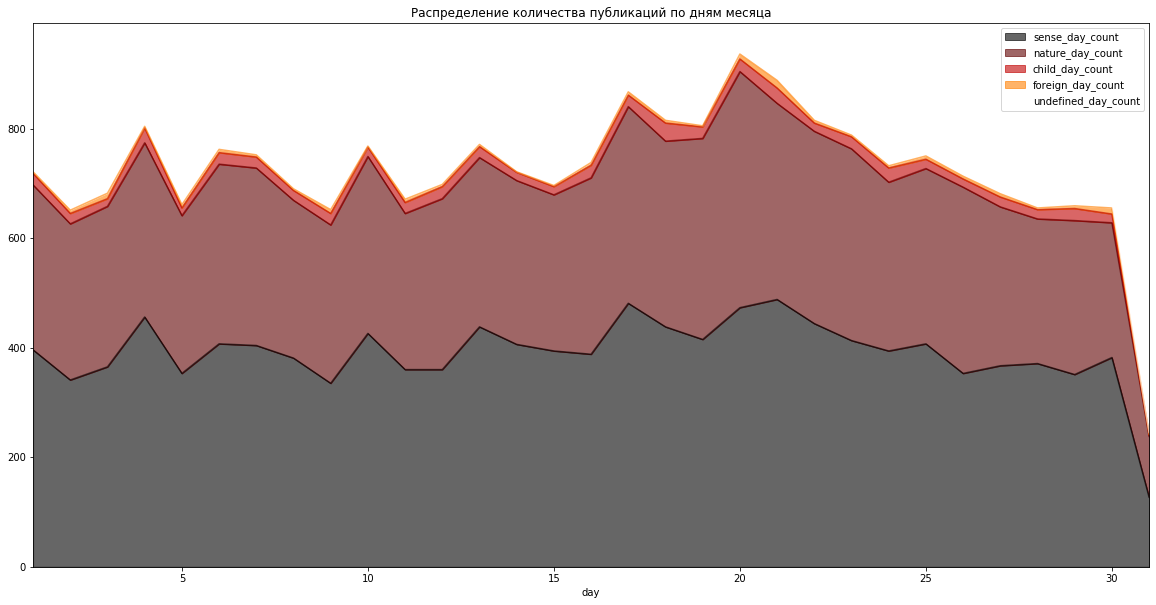

In [244]:
summary_by_monthday_counts.plot(figsize=(20,10), kind='area', colormap='gist_heat', alpha=0.6, title='Распределение количества публикаций по дням месяца');

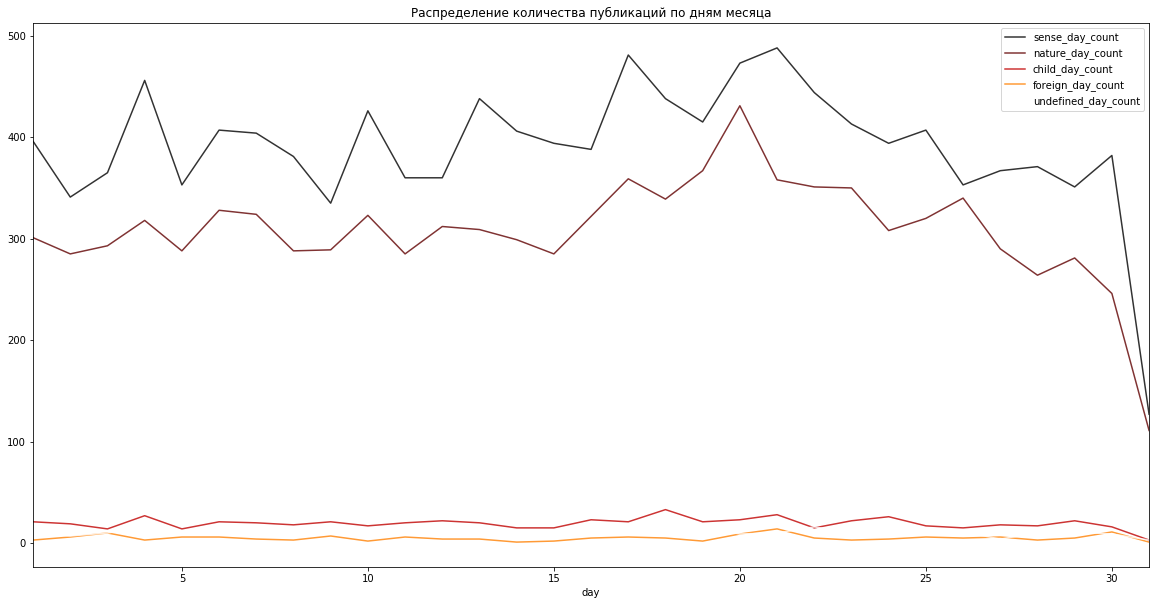

In [245]:
summary_by_monthday_counts.plot(figsize=(20,10), kind='line', colormap='gist_heat', alpha=0.8, title='Распределение количества публикаций по дням месяца');

<div class='alert alert-block alert-warning'>
    <p><b>МАКСИМУМ ПУБЛИКАЦИЙ ПРИХОДИТСЯ НА 20-Е ЧИСЛО, ПРИ ЭТОМ, ЯРЧЕ ОН ВЫРАЖЕН У ПУБЛИКАЦИЙ О ПРИРОДЕ И ПОГОДЕ.</b></p>
    <p>СООТВЕТСТВЕННО, ЕСТЬ ВОСХОДЯЩИЙ И НИСХОДЯЩИЙ ТРЕНДЫ ОТ НАЧАЛА И К КОНЦУ МЕСЯЦА.</p>
</div>

In [246]:
def get_by_month_counts(df, name_prefix=None):
    count_df = df['date'].groupby(by=[text_category_scores['date'].dt.month.rename('month')]).agg({'count'})
    count_df.reset_index(inplace=True)
    month_names = {1:'01_January', 2:'02_February', 3:'03_March', 4:'04_April', 5:'05_May', 6:'06_June', 7:'07_July', 8:'08_August', 9:'09_September', 10:'10_October', 11:'11_November', 12:'12_December'}
    count_df['month'] = count_df['month'].apply(lambda x:month_names[x])
    count_df.set_index('month', inplace=True)
    if name_prefix is None:
        count_df.columns = ['month_count']
    else:
        count_df.columns = [f'{name_prefix}_month_count']    
    return count_df

In [247]:
get_by_month_counts(nature_df, 'nature')

,nature_month_count
month,
01_January,415
02_February,637
03_March,994
04_April,1018
05_May,906
06_June,828
07_July,587
08_August,789
09_September,912


In [248]:
sense_by_month_counts = get_by_month_counts(sense_df, 'sense')
nature_by_month_counts = get_by_month_counts(nature_df, 'nature')
child_by_month_counts = get_by_month_counts(child_df, 'child')
foreign_by_month_counts = get_by_month_counts(foreign_df, 'foreign')
undefined_by_month_counts = get_by_month_counts(undefined_df, 'undefined')

summary_by_month_counts = pd.concat([sense_by_month_counts, nature_by_month_counts, child_by_month_counts, foreign_by_month_counts, undefined_by_month_counts], axis=1, sort=True).fillna(0)

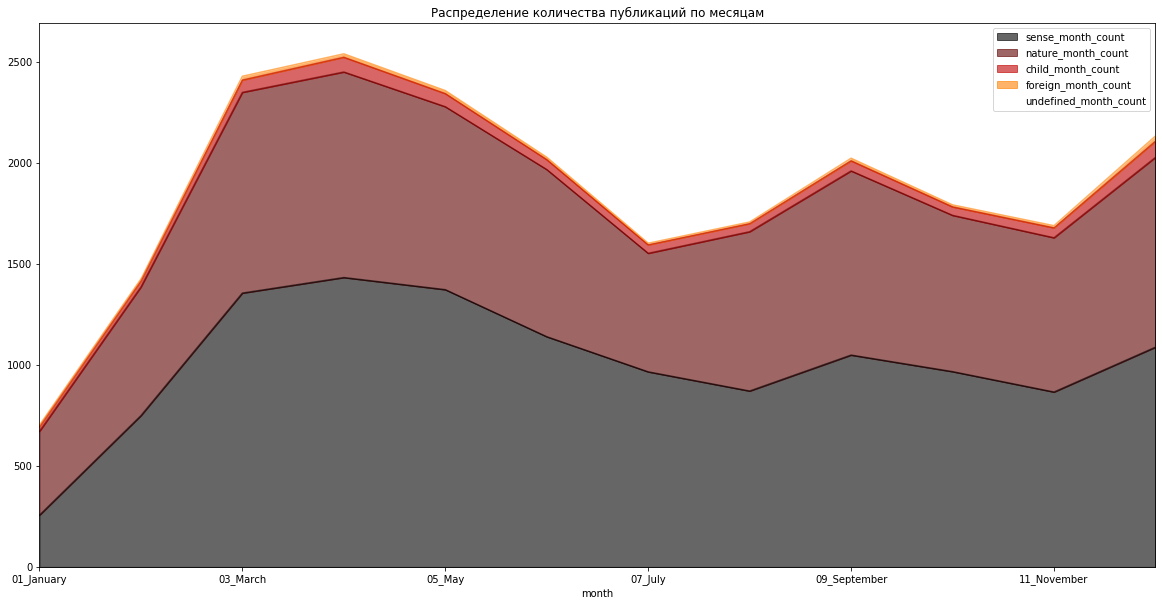

In [249]:
summary_by_month_counts.plot(figsize=(20,10), kind='area', colormap='gist_heat', alpha=0.6, title='Распределение количества публикаций по месяцам');

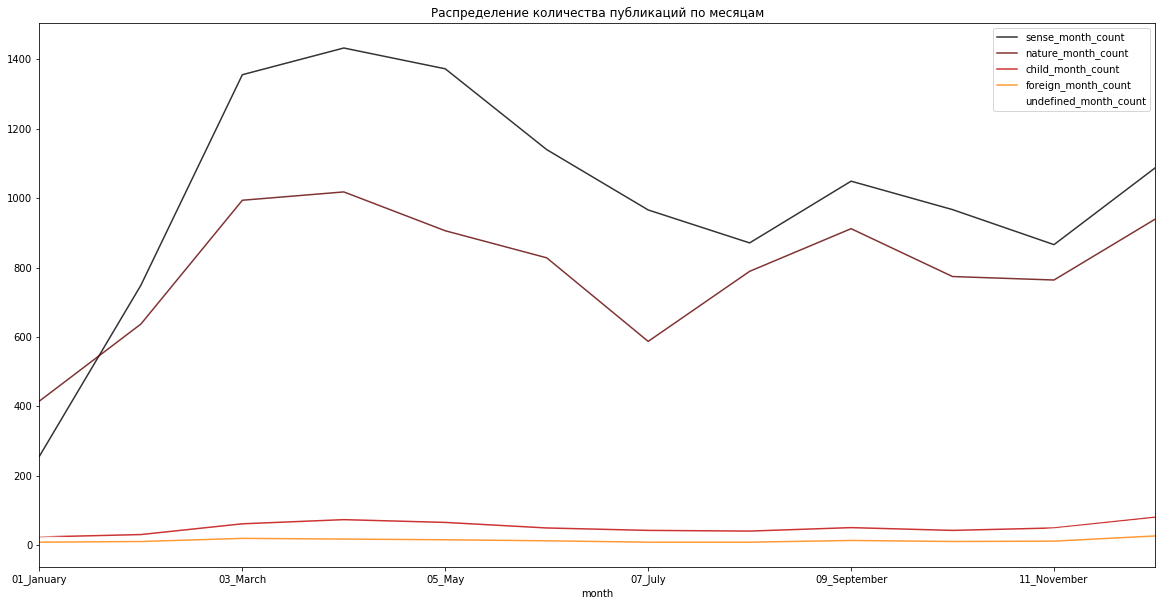

In [250]:
summary_by_month_counts.plot(figsize=(20,10), kind='line', colormap='gist_heat', alpha=0.8, title='Распределение количества публикаций по месяцам');

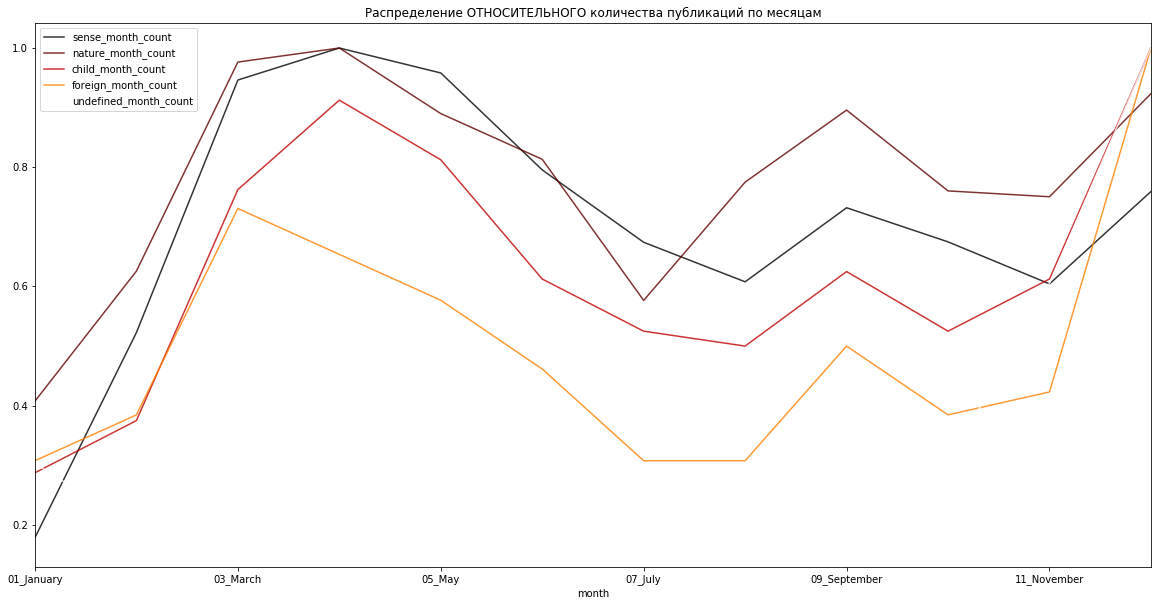

In [251]:
summary_by_month_normalized_counts = summary_by_month_counts / summary_by_month_counts.max(axis=0)
summary_by_month_normalized_counts.plot(figsize=(20,10), kind='line', colormap='gist_heat', alpha=0.8, title='Распределение ОТНОСИТЕЛЬНОГО количества публикаций по месяцам');

<div class='alert alert-block alert-warning'>
    <p><b>ИНТЕРЕСНО, ЧТО МАКСИМУМ ПУБЛИКАЦИЙ ПРИХОДИТСЯ НА ТРИ ВЕСЕННИХ МЕСЯЦА - МАРТ, АПРЕЛЬ, МАЙ</b></p>
    <p>СЛЕДУЮЩИЙ ПИК - СЕНТЯБРЬ, НАКОПЛЕННЫЕ ВПЕЧАТЛЕНИЯ ОБ ОТПУСКАХ.</p>
    <p>ПРОВАЛЫ ИНТЕРЕСА К ПРИРОДЕ И ПОГОДЕ - В РАЗГАР ЛЕТА И ОСЕНИ - ИЮЛЬ И НОЯБРЬ.</p>
    <p>В ЯНВАРЕ ПУБЛИКАЦИЙ О ПРИРОДЕ СТАНОВИТСЯ БОЛЬШЕ ВСЕГО! В АВГУСТЕ И НОЯБРЕ  ПОЧТИ ПОРОВНУ С ПУБЛИКАЦИЯМИ О СМЫСЛЕ ЖИЗНИ.</p>
    <p>И ПИК В КОНЦЕ ГОДА - ПОДВЕДЕНИЕ ИТОГОВ</p>
</div>

In [252]:
def get_by_weekday_counts(df, name_prefix=None):
    count_df = df['date'].groupby(by=[text_category_scores['date'].dt.dayofweek.rename('dayofweek')]).agg({'count'})
    count_df.reset_index(inplace=True)
    weekday_names = {0:'1_Monday', 1:'2_Tuesday', 2:'3_Wednesday', 3:'4_Thursday', 4:'5_Friday', 5:'6_Saturday', 6:'7_Sunday'}
    count_df['dayofweek'] = count_df['dayofweek'].apply(lambda x:weekday_names[x])
    count_df.set_index('dayofweek', inplace=True)
    if name_prefix is None:
        count_df.columns = ['weekday_count']
    else:
        count_df.columns = [f'{name_prefix}_weekday_count']    
    return count_df

In [253]:
sense_by_weekday_counts = get_by_weekday_counts(sense_df, 'sense')
nature_by_weekday_counts = get_by_weekday_counts(nature_df, 'nature')
child_by_weekday_counts = get_by_weekday_counts(child_df, 'child')
foreign_by_weekday_counts = get_by_weekday_counts(foreign_df, 'foreign')
undefined_by_weekday_counts = get_by_weekday_counts(undefined_df, 'undefined')

summary_by_weekday_counts = pd.concat([sense_by_weekday_counts, nature_by_weekday_counts, child_by_weekday_counts, foreign_by_weekday_counts, undefined_by_weekday_counts], axis=1, sort=True).fillna(0)

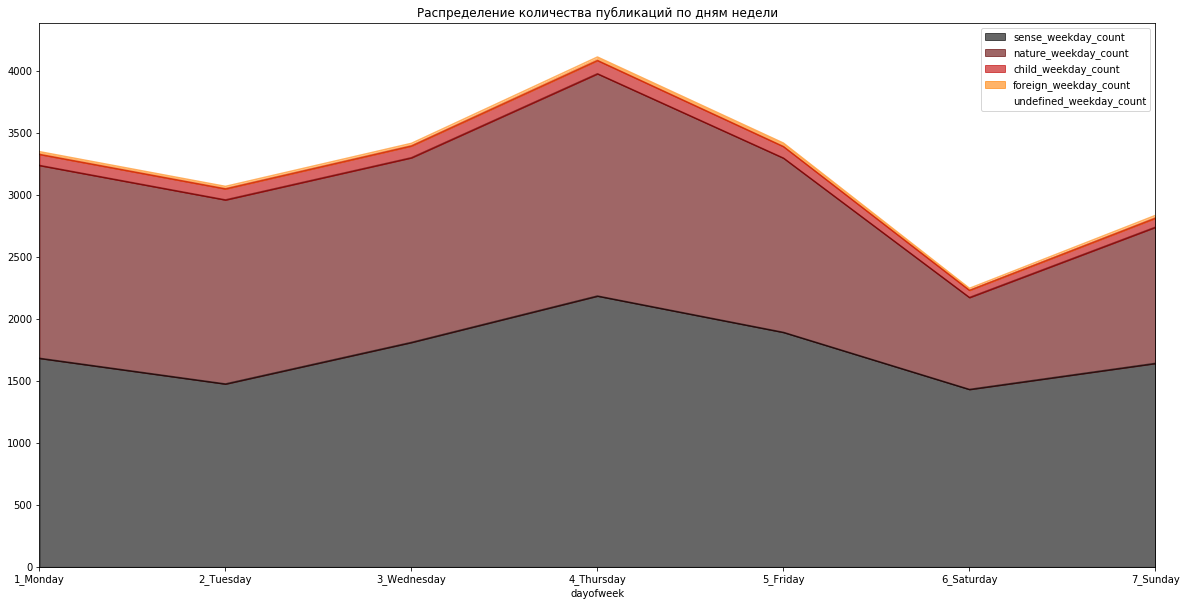

In [254]:
summary_by_weekday_counts.plot(figsize=(20,10), kind='area', colormap='gist_heat', alpha=0.6, title='Распределение количества публикаций по дням недели');

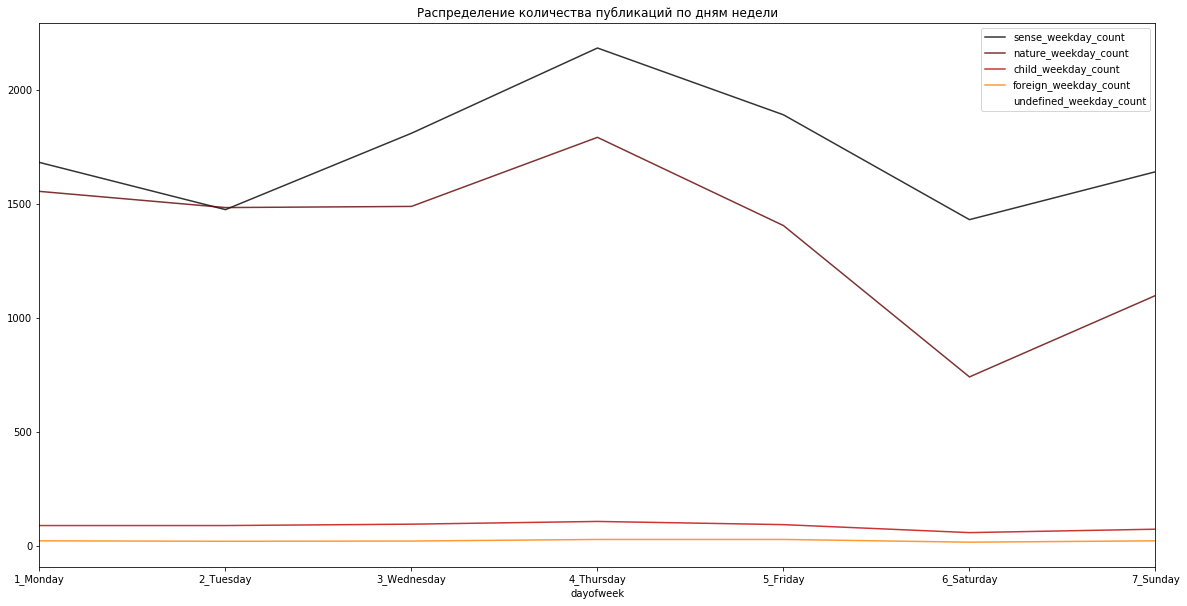

In [255]:
summary_by_weekday_counts.plot(figsize=(20,10), kind='line', colormap='gist_heat', alpha=0.8, title='Распределение количества публикаций по дням недели');

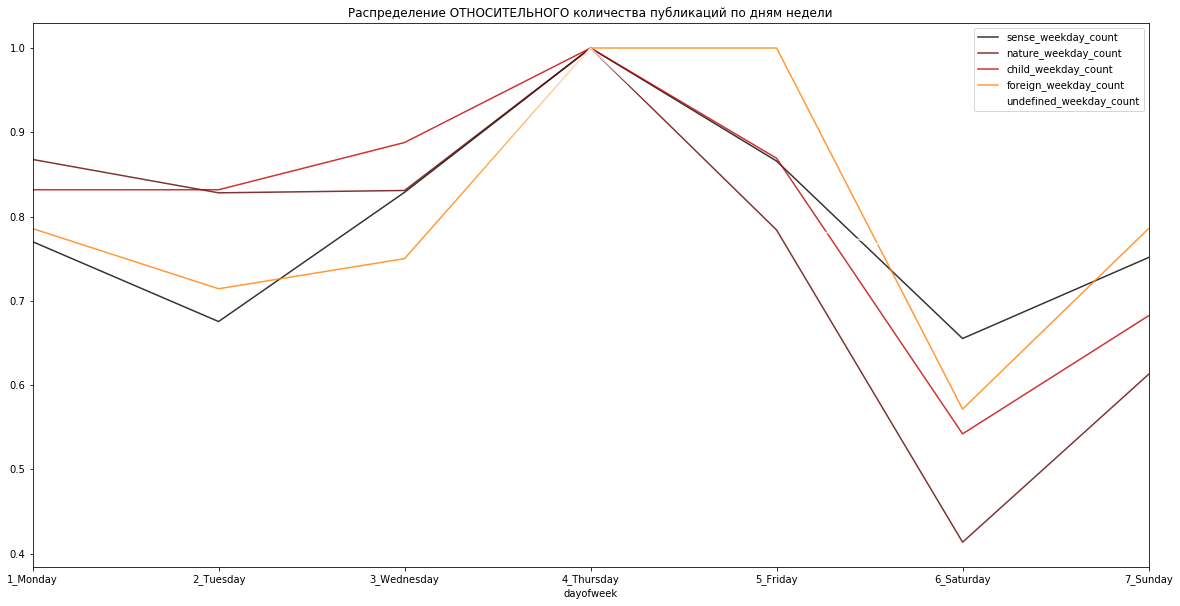

In [256]:
summary_by_weekday_normalized_counts = summary_by_weekday_counts / summary_by_weekday_counts.max(axis=0)
summary_by_weekday_normalized_counts.plot(figsize=(20,10), kind='line', colormap='gist_heat', alpha=0.8, title='Распределение ОТНОСИТЕЛЬНОГО количества публикаций по дням недели');

<div class='alert alert-block alert-warning'>
    <p><b>МАКСИМУМ ПУБЛИКАЦИЙ - В ЧЕТВЕРГ, МИНИМУМ - В СУББОТУ</b></p>
    <p>В ПОНЕДЕЛЬНИК И ВТОРНИК КОЛИЧЕСТВО ПУБЛИКАЦИЙ О СМЫСЛЕ ЖИЗНИ И ПРИРОДЕ/ПОГОДЕ ПРИМЕНО ПОПРОВНУ, К КОНЦУ НЕДЕЛИ О ПРИРОДЕ ПИШУТ МЕНЬШЕ.</p>    
</div>